['Brazil_10500000', 'Brazil_10910000', 'Brazil_12180000', 'Brazil_12200000', 'Brazil_12370000', 'Brazil_12390000', 'Brazil_12520000', 'Brazil_12540000', 'Brazil_12560000', 'Brazil_12650000', 'Brazil_12700000', 'Brazil_13170000', 'Brazil_13180000', 'Brazil_13410000', 'Brazil_13710001', 'Brazil_13750000', 'Brazil_13880000', 'Brazil_14110000', 'Brazil_14230000', 'Brazil_14250000', 'Brazil_14260000', 'Brazil_14450000', 'Brazil_14488000', 'Brazil_14515000', 'Brazil_14650000', 'Brazil_14850000', 'Brazil_15150000', 'Brazil_15200000', 'Brazil_15320002', 'Brazil_15400000', 'Brazil_15556010', 'Brazil_15560000', 'Brazil_15790000', 'Brazil_15828000', 'Brazil_15930000', 'Brazil_16200000', 'Brazil_16370000', 'Brazil_16430000', 'Brazil_16460000', 'Brazil_16500000', 'Brazil_17093000', 'Brazil_17122000', 'Brazil_17200000', 'Brazil_17280000', 'Brazil_17343000', 'Brazil_17380000', 'Brazil_17610000', 'Brazil_17675000', 'Brazil_18590000', 'Brazil_18650000', 'Brazil_20250000', 'Brazil_20489100', 'Brazil_215

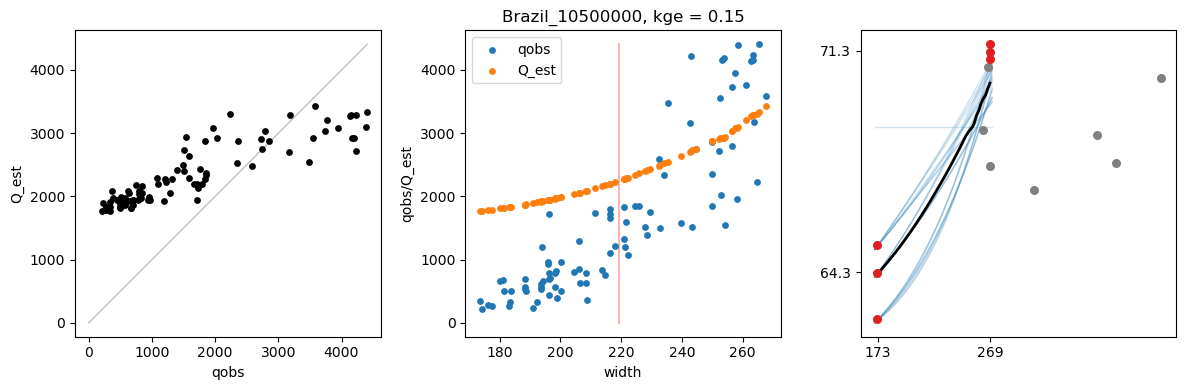

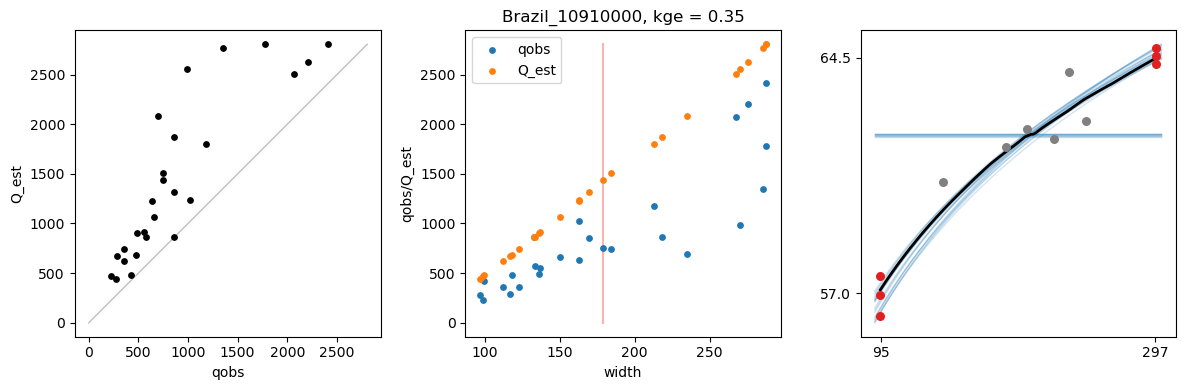

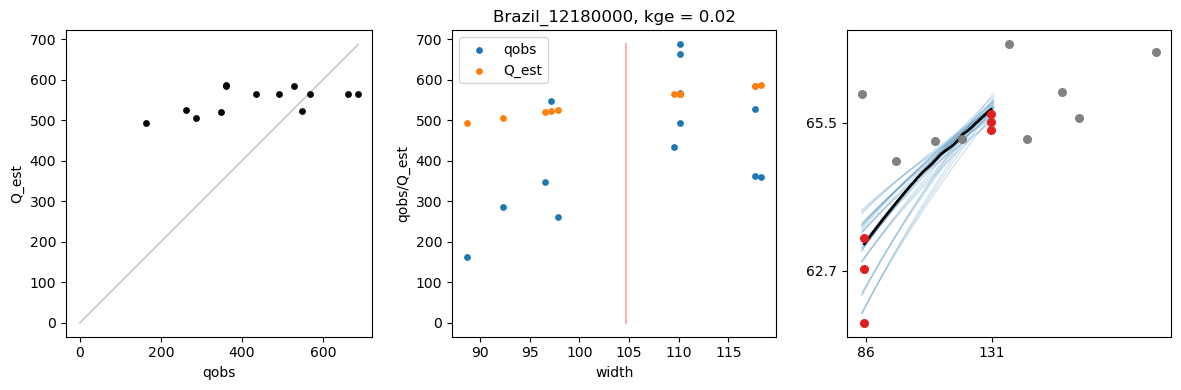

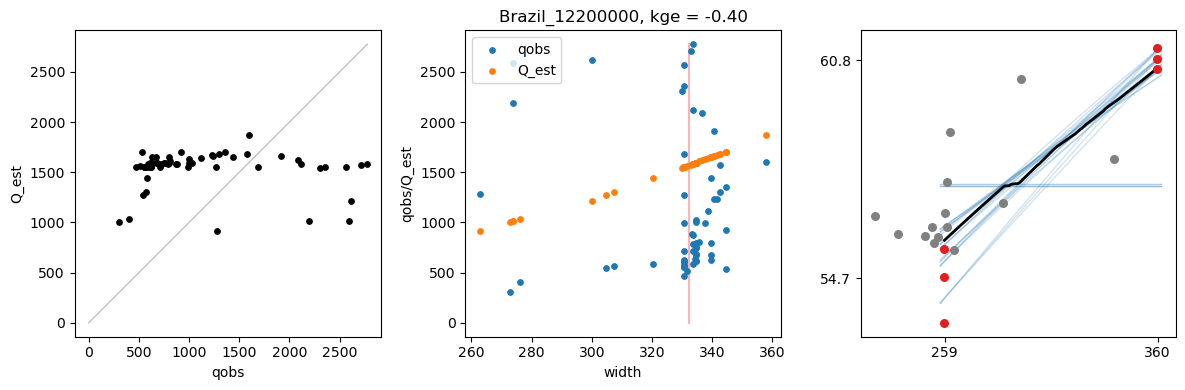

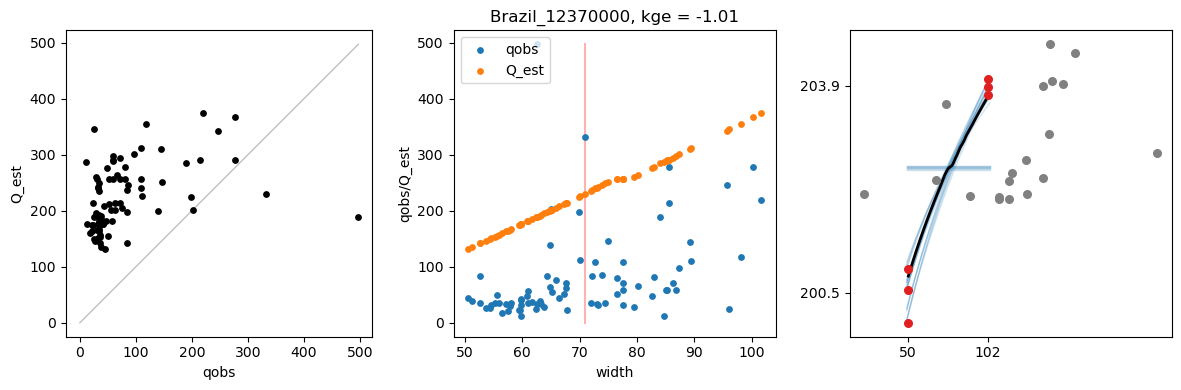

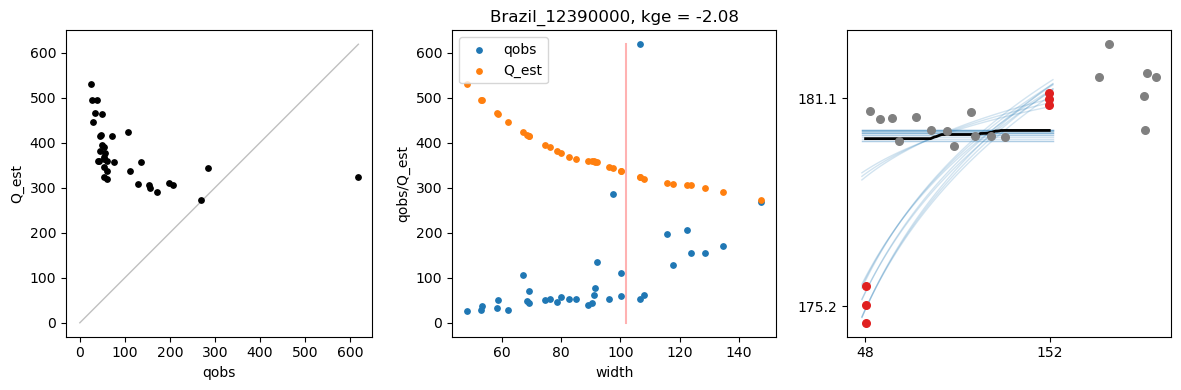

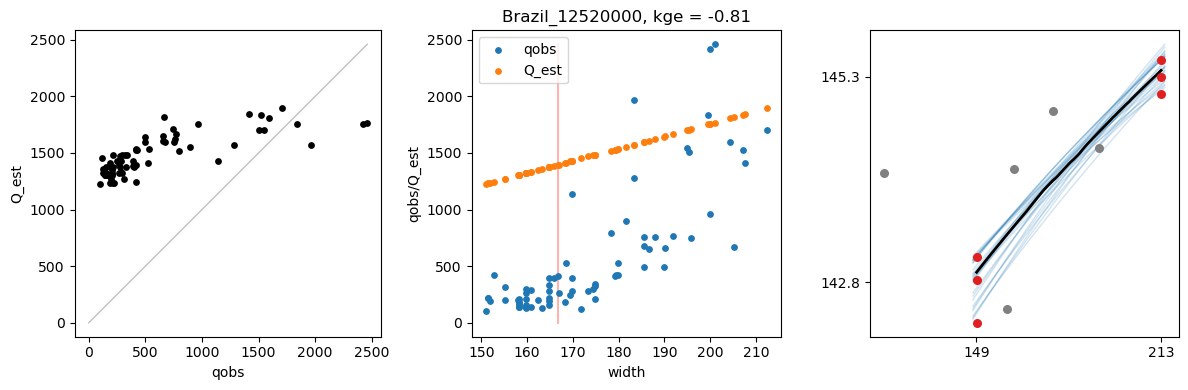

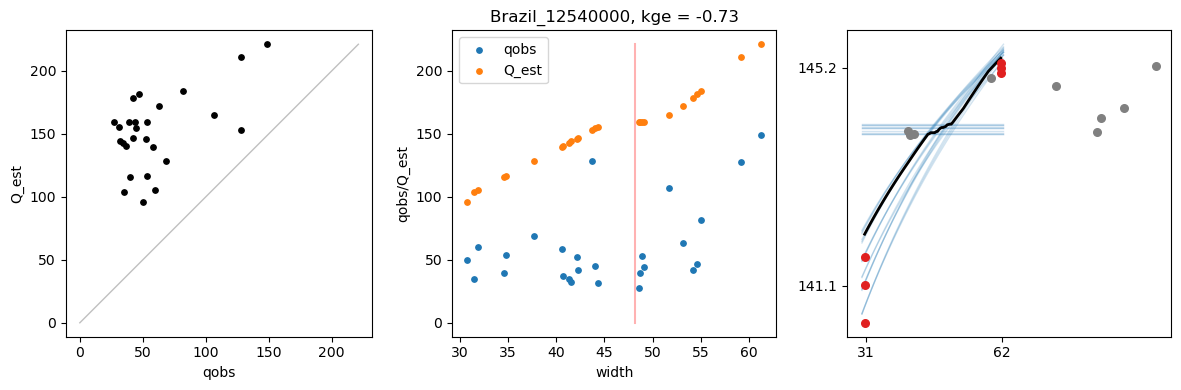

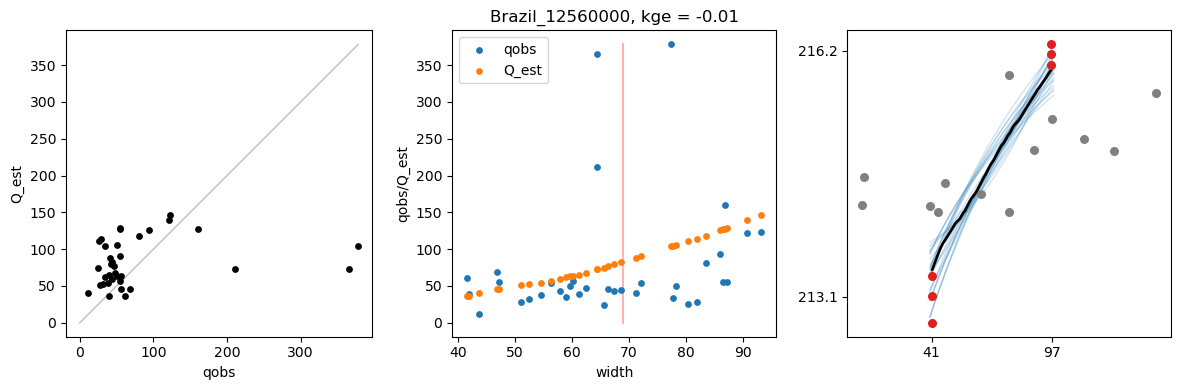

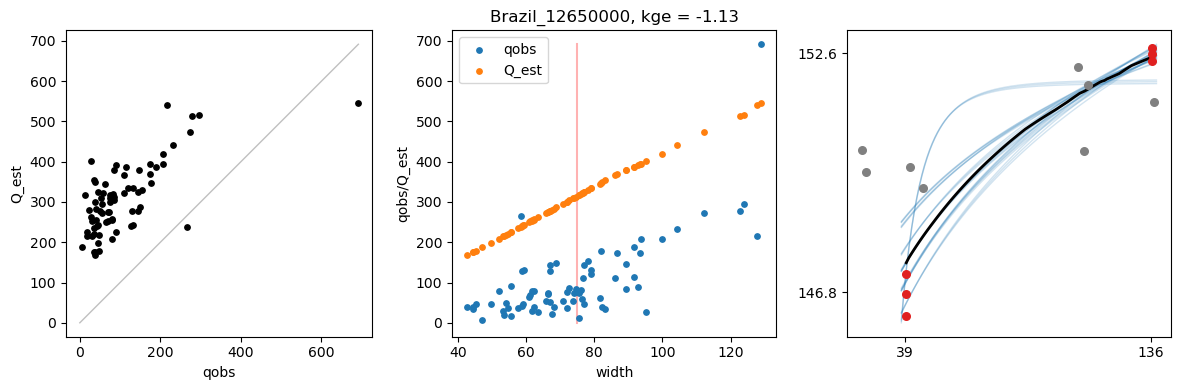

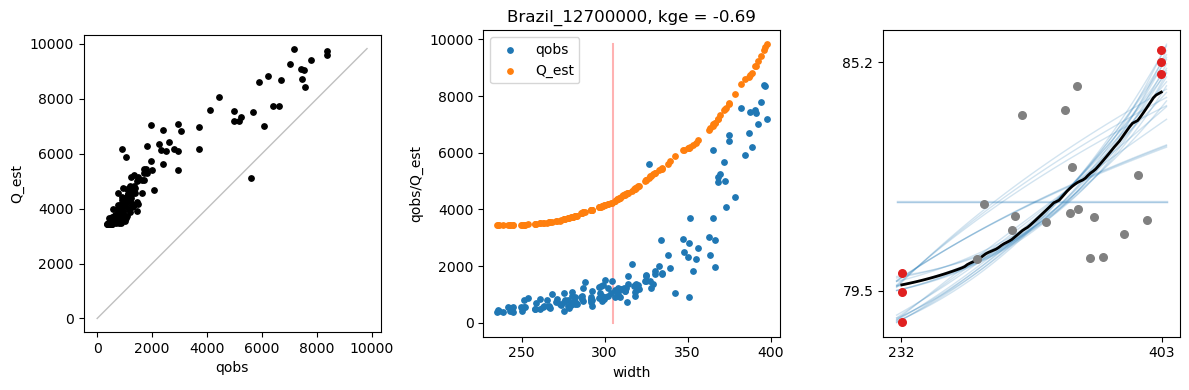

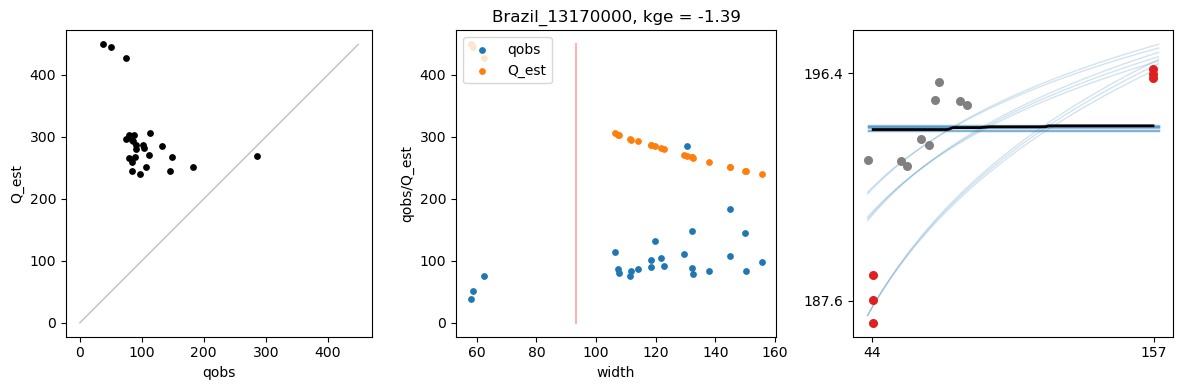

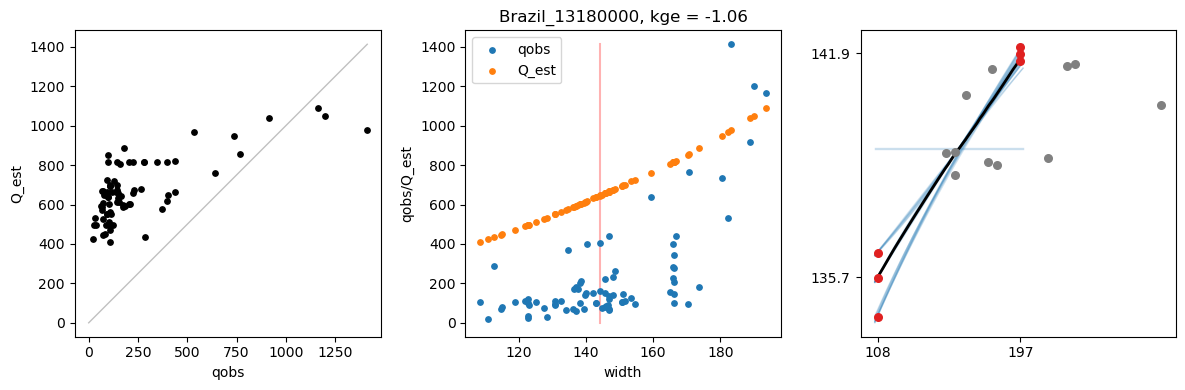

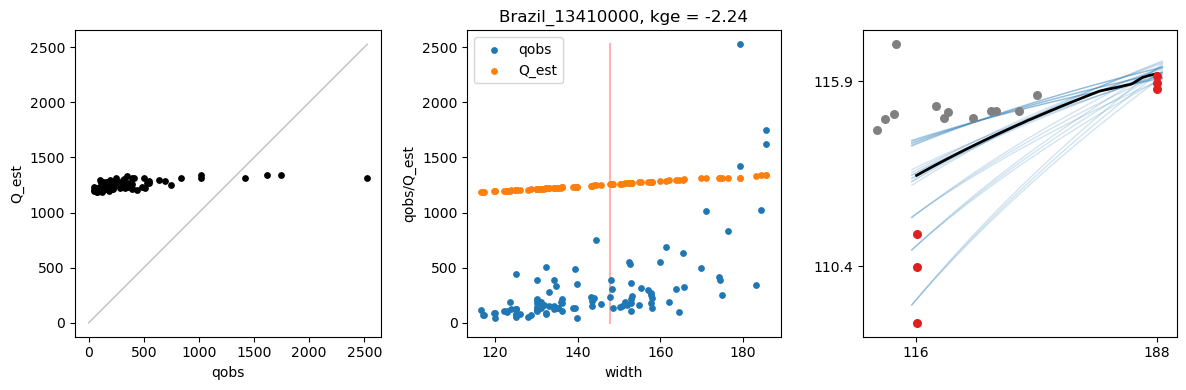

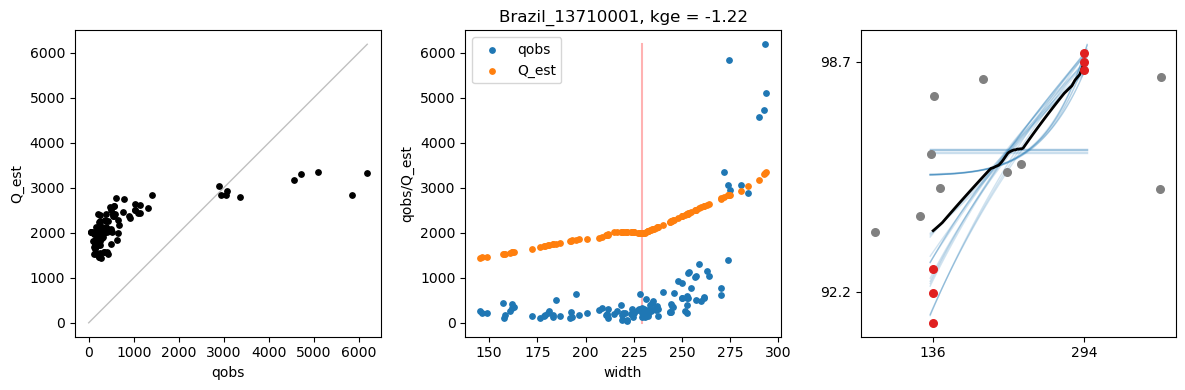

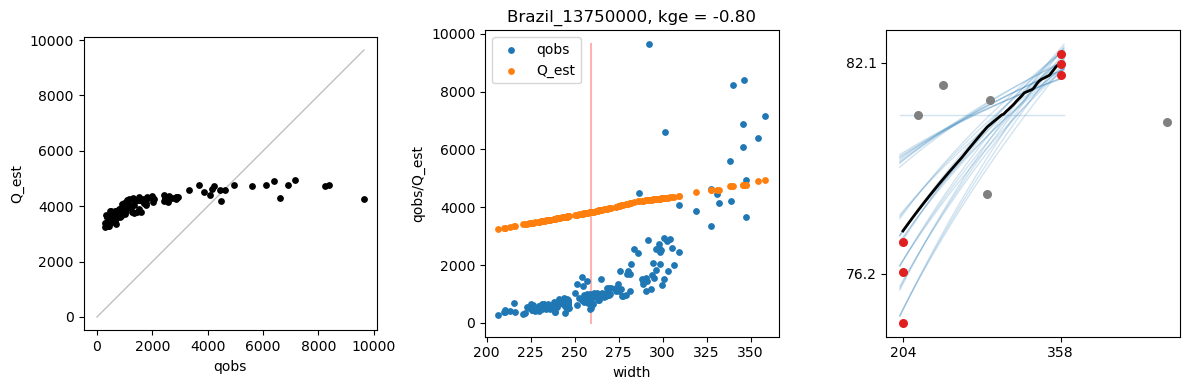

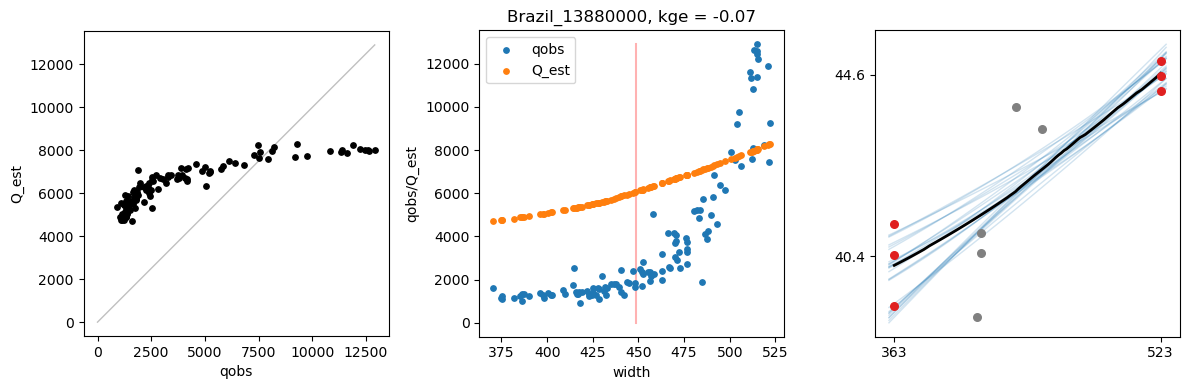

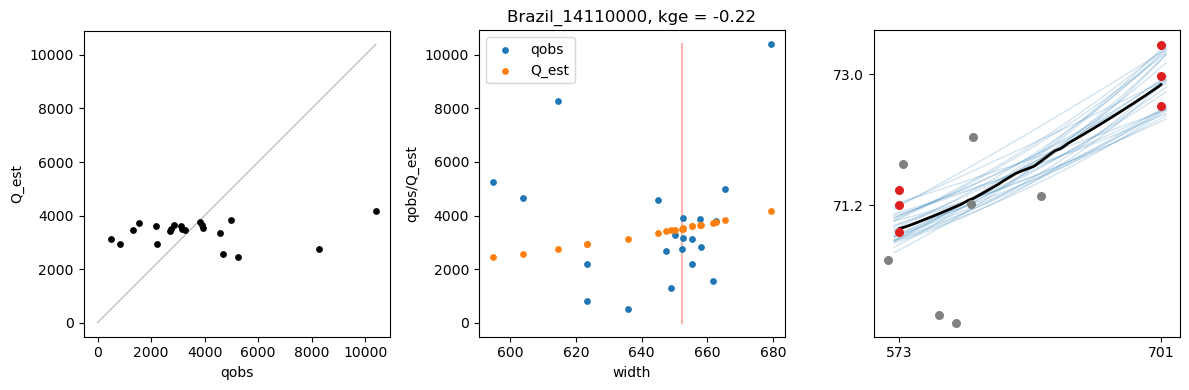

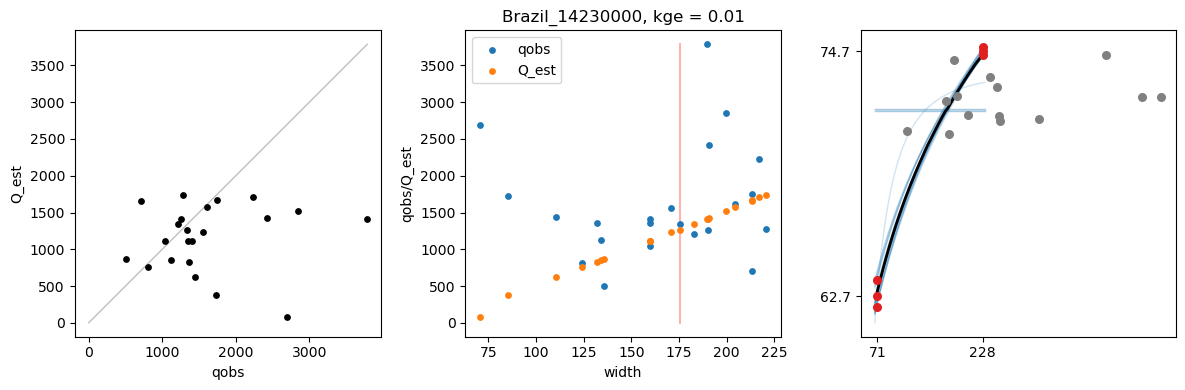

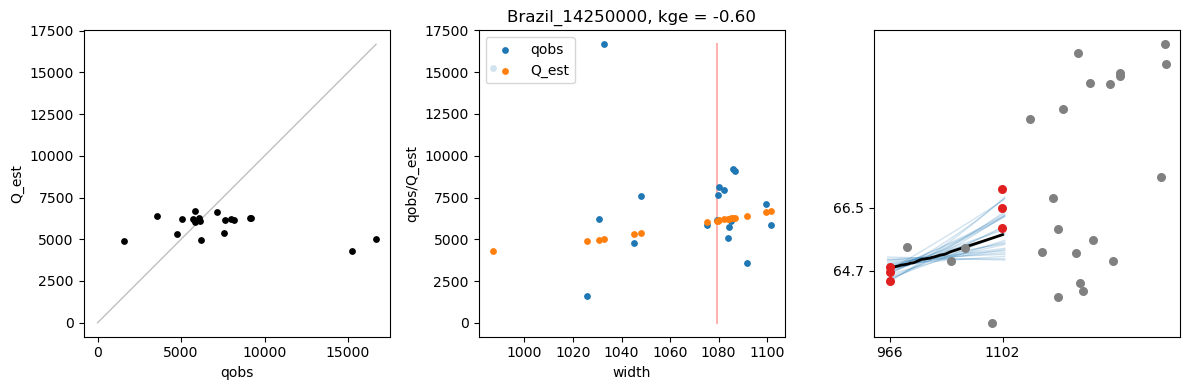

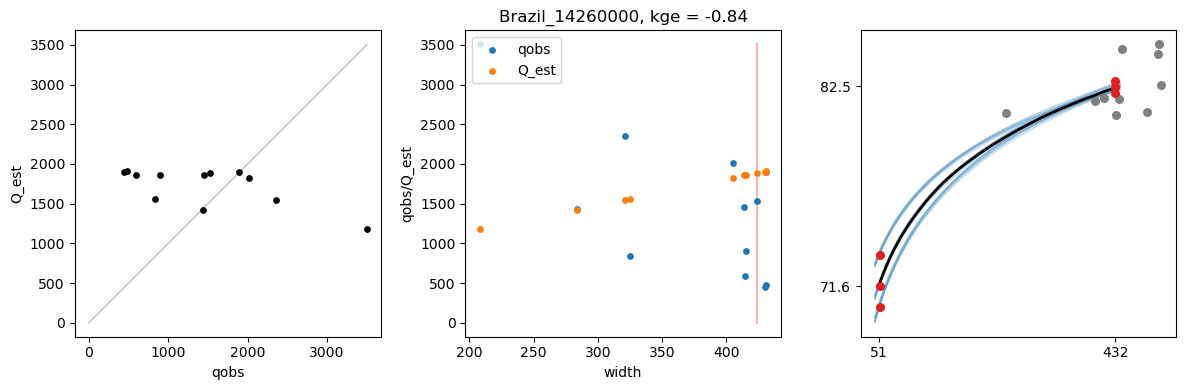

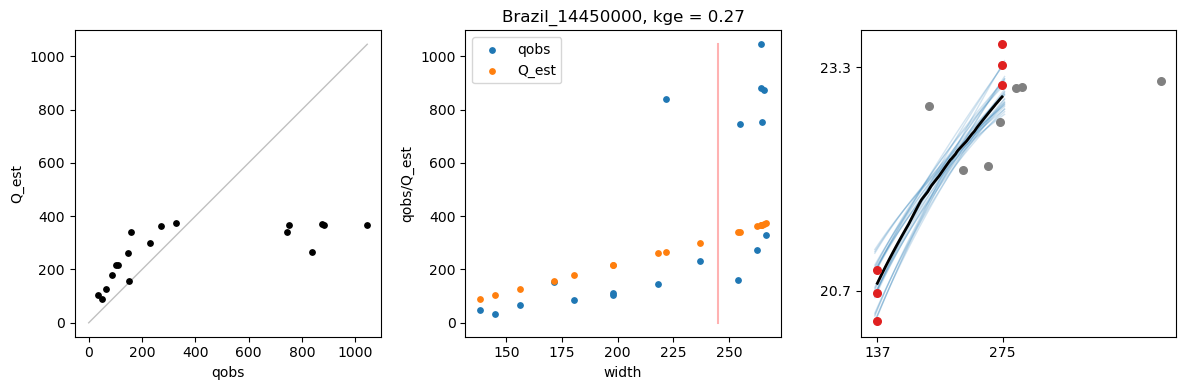

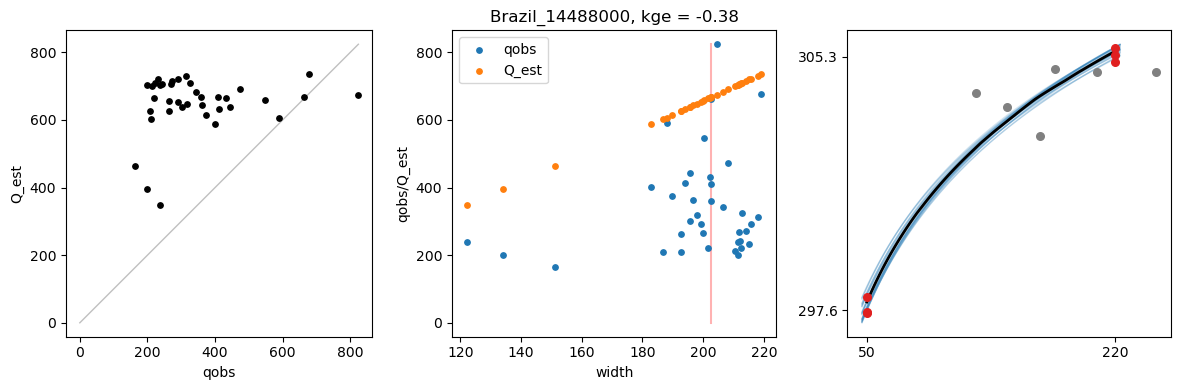

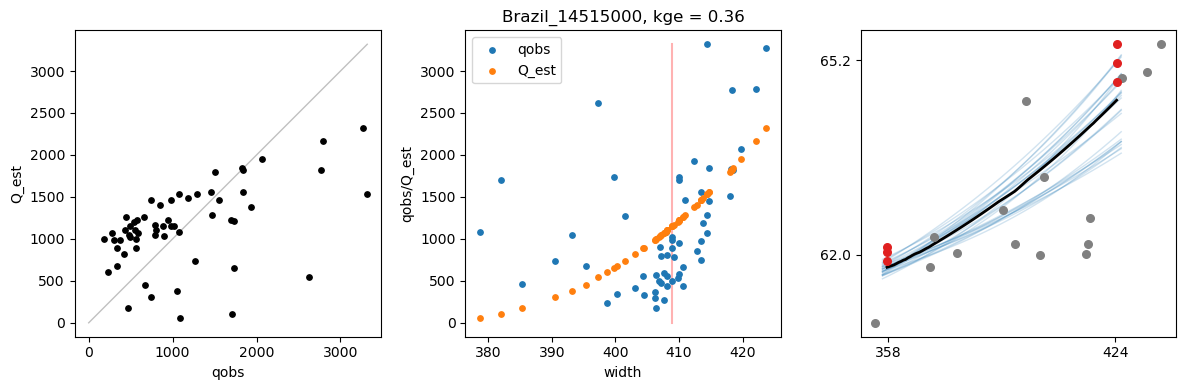

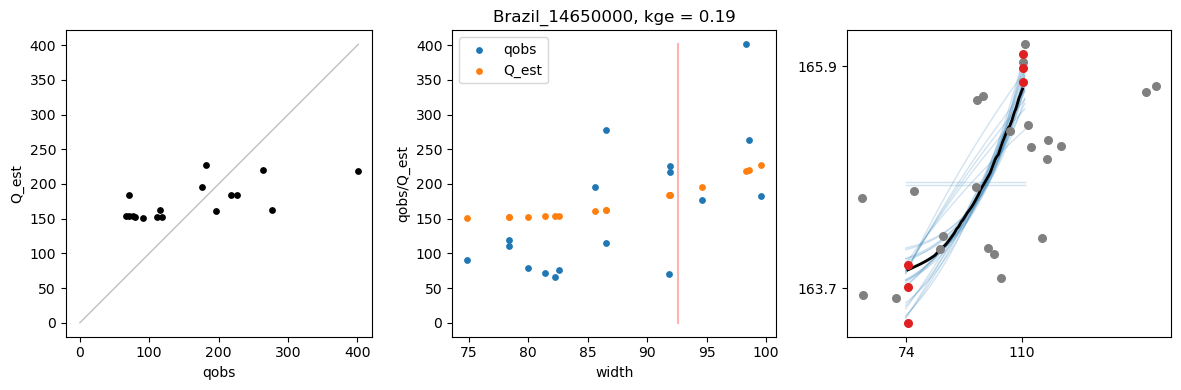

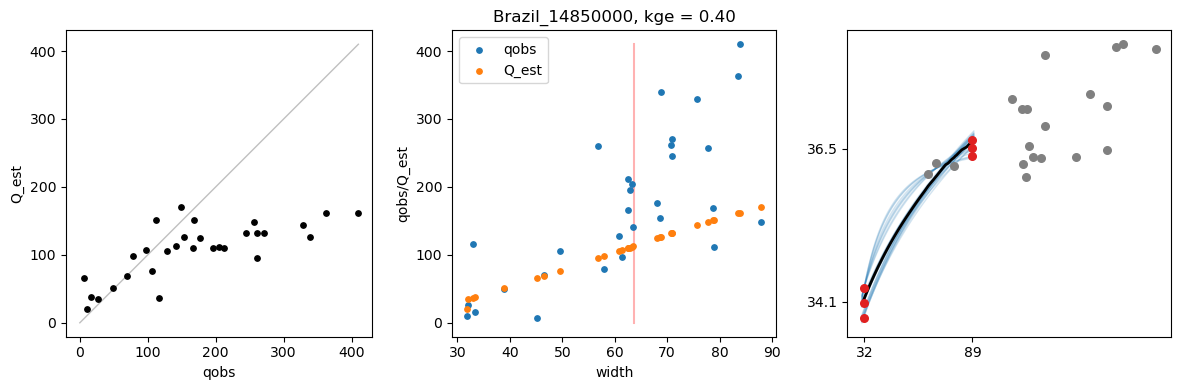

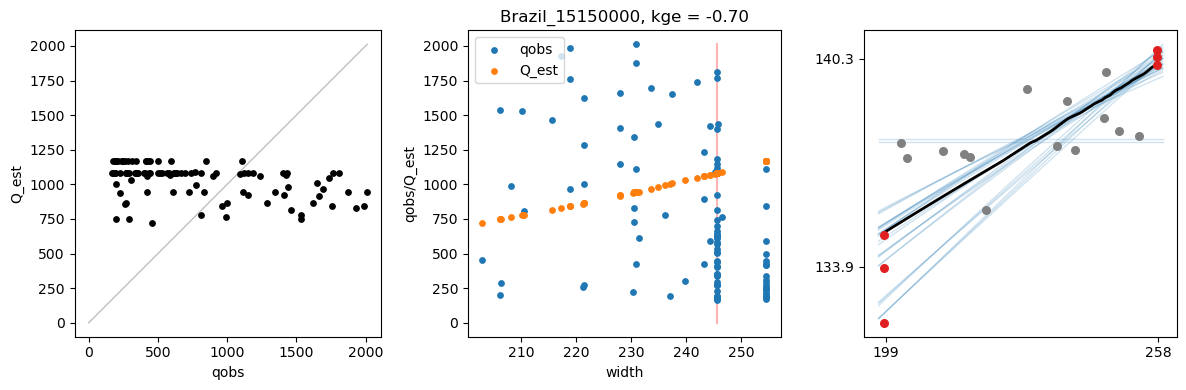

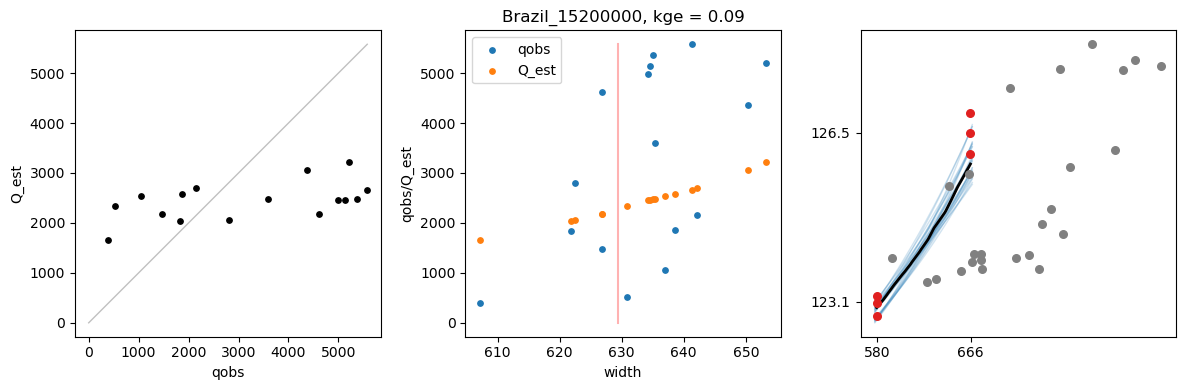

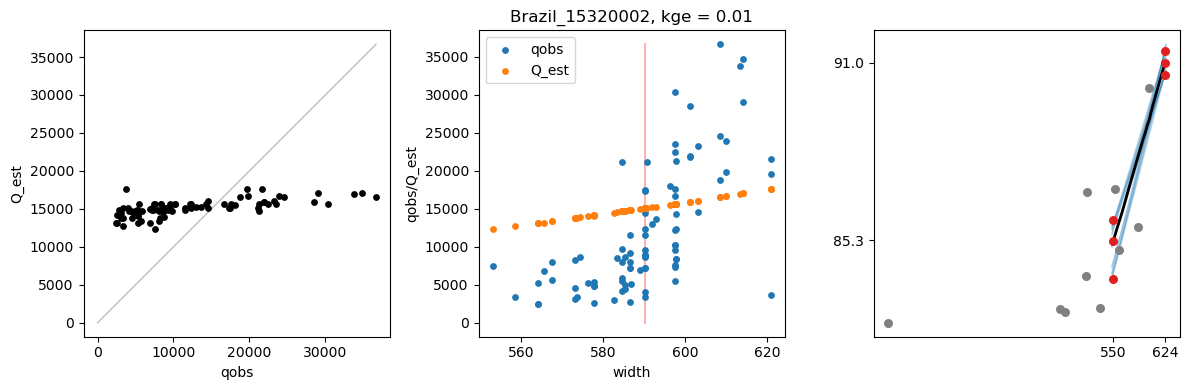

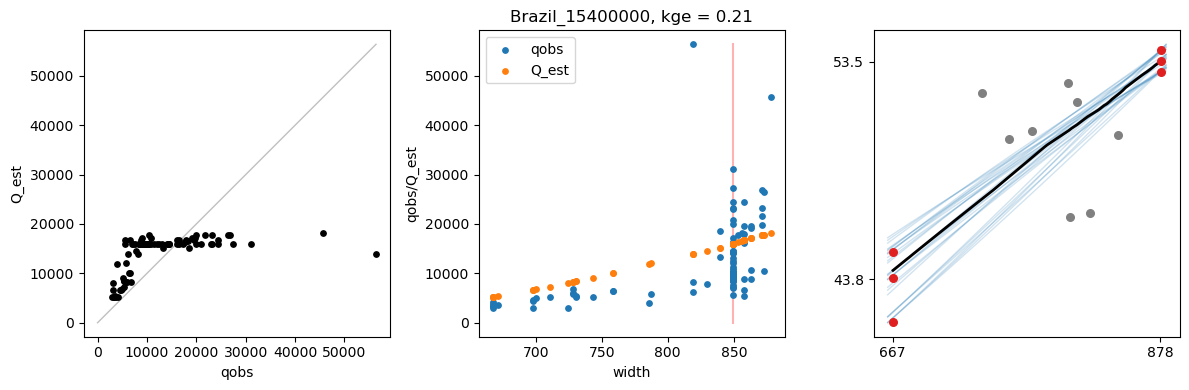

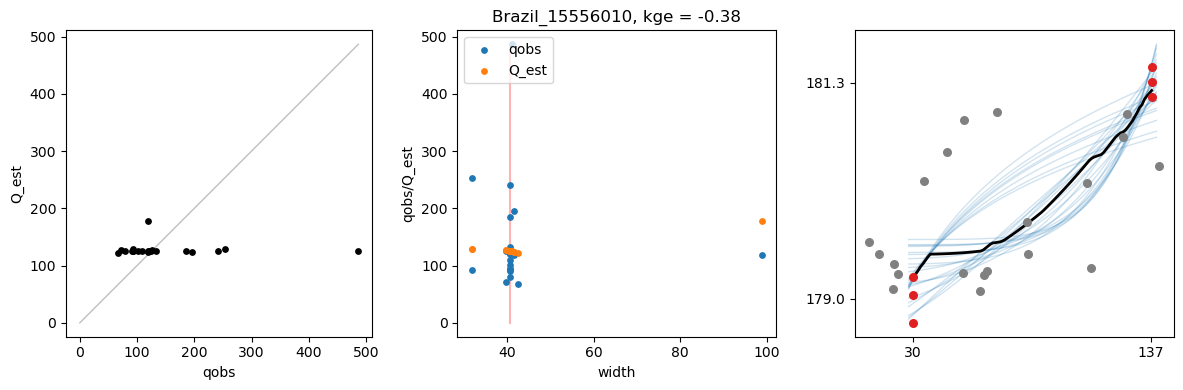

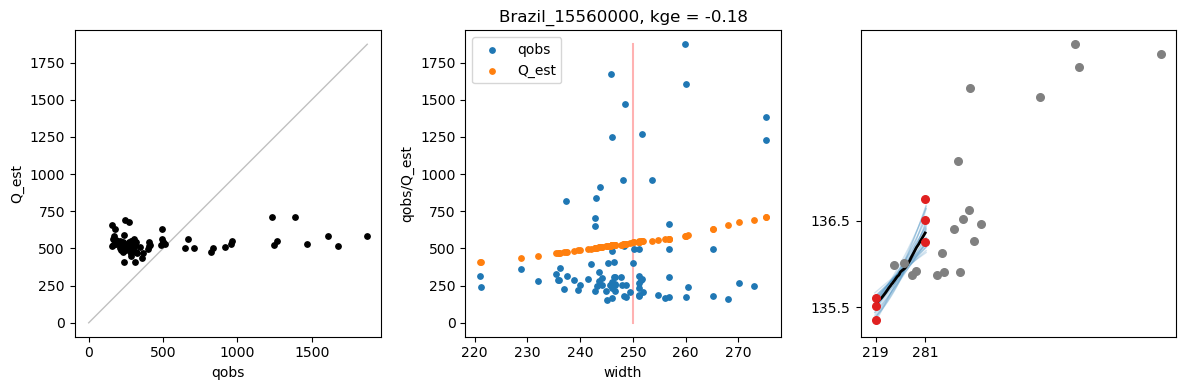

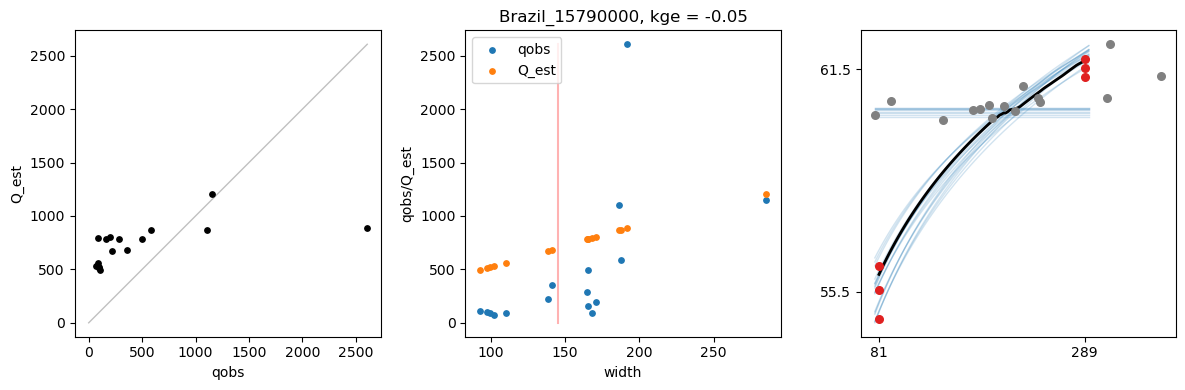

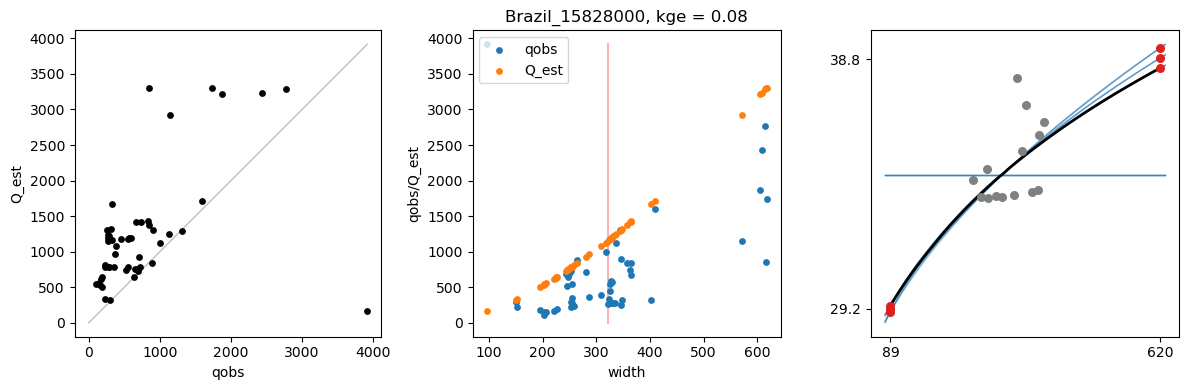

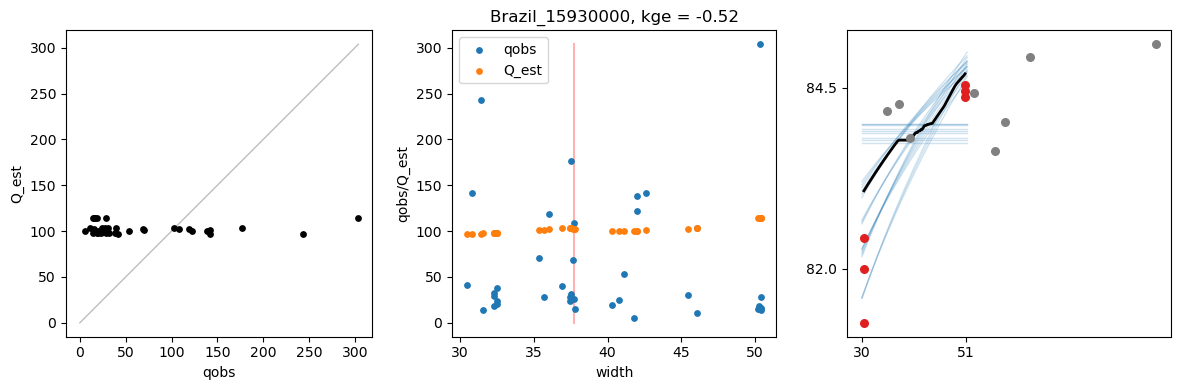

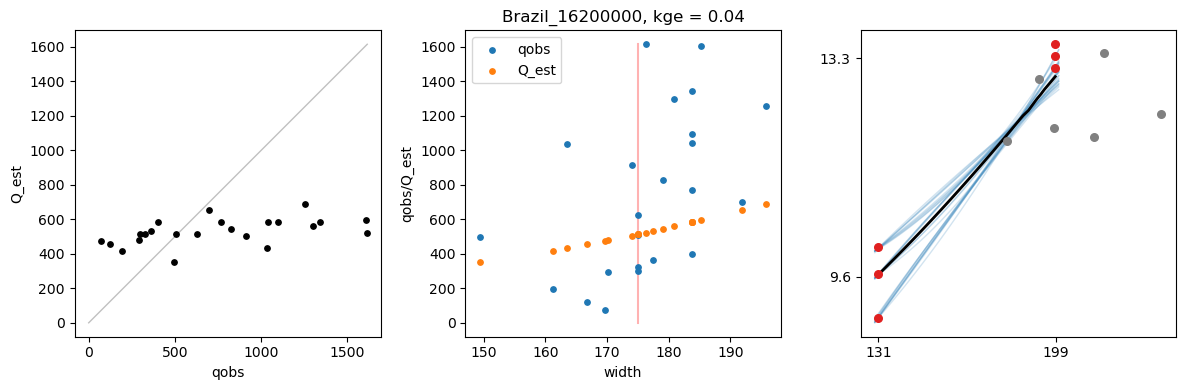

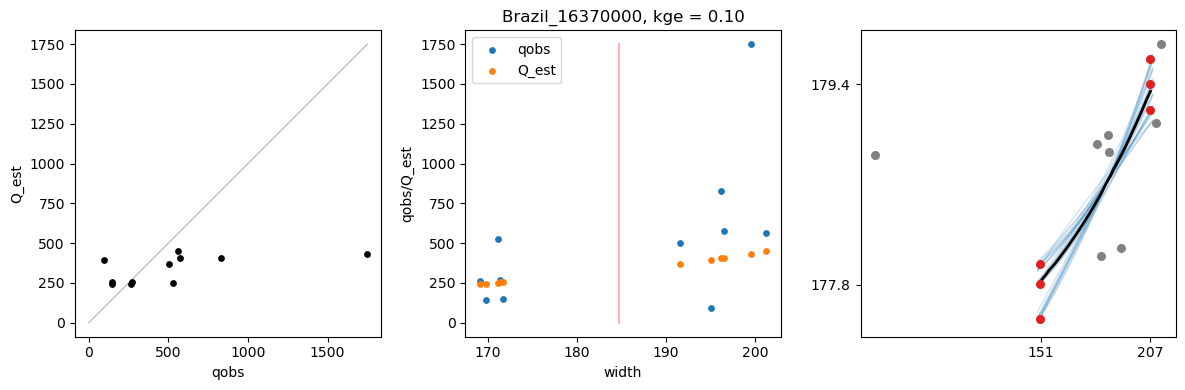

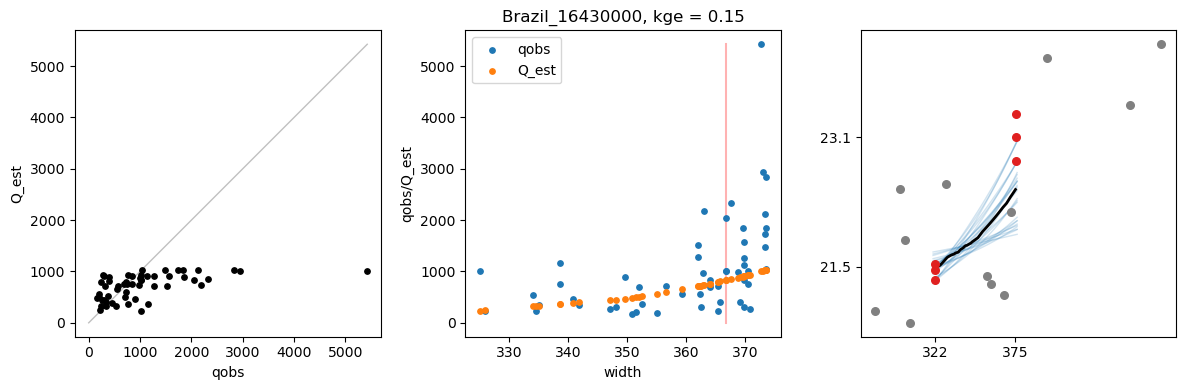

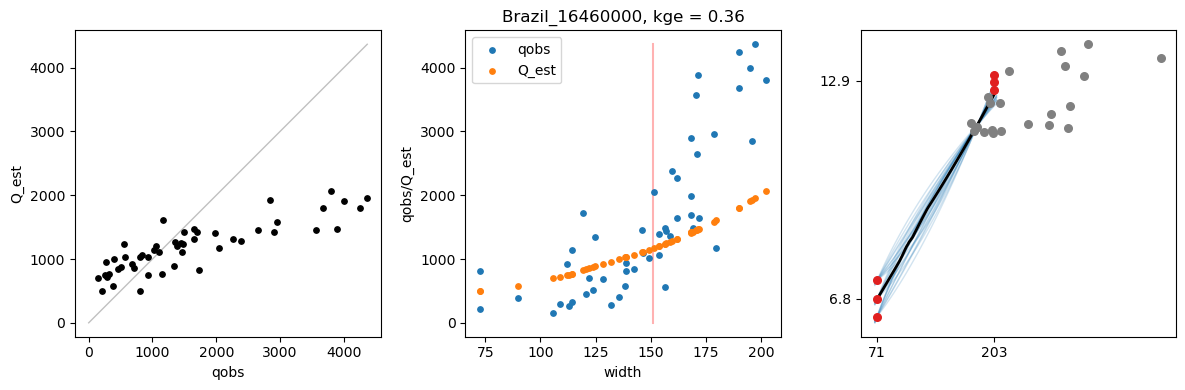

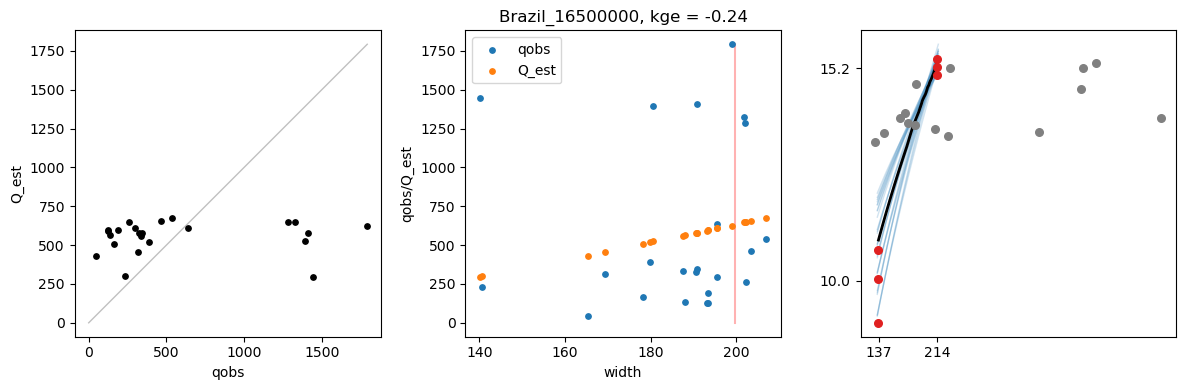

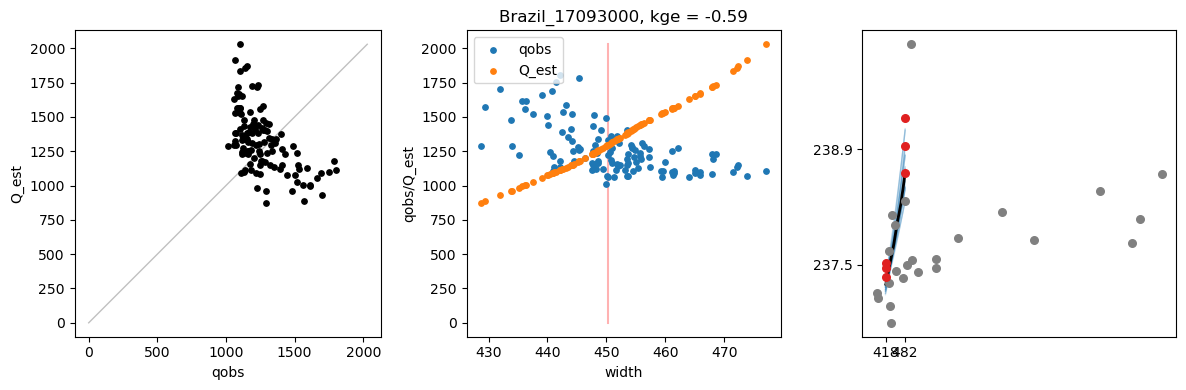

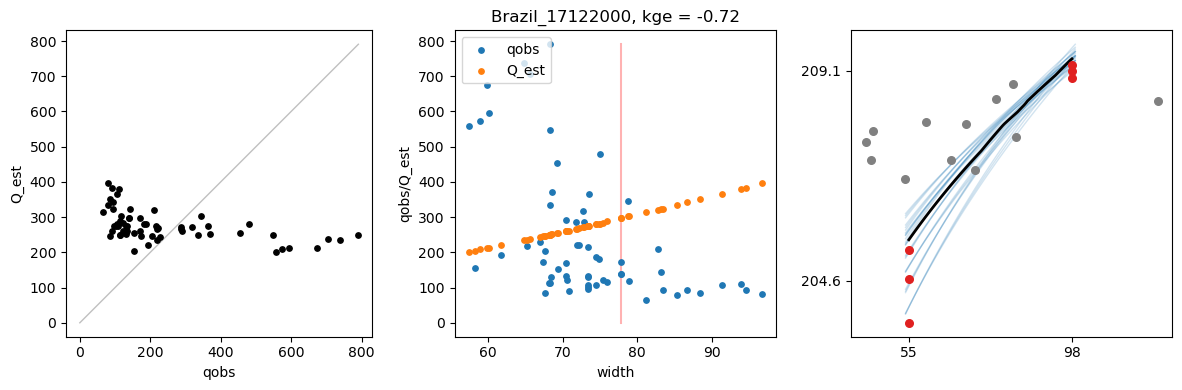

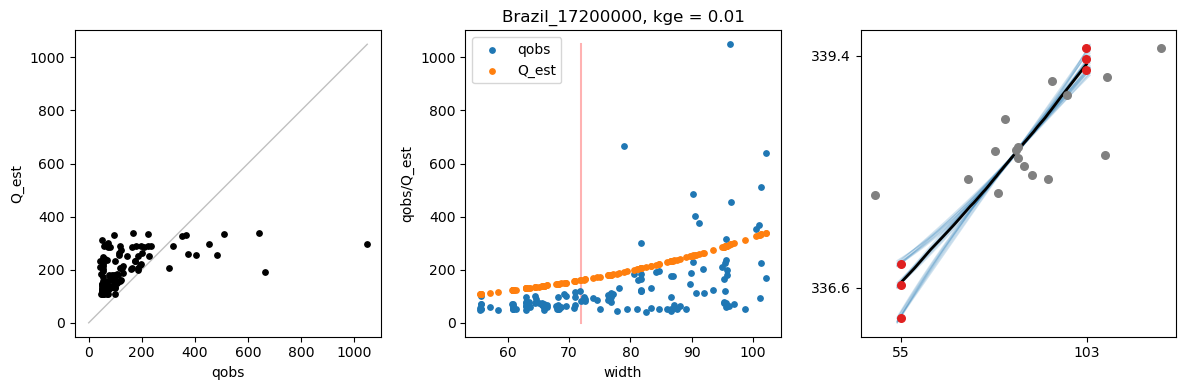

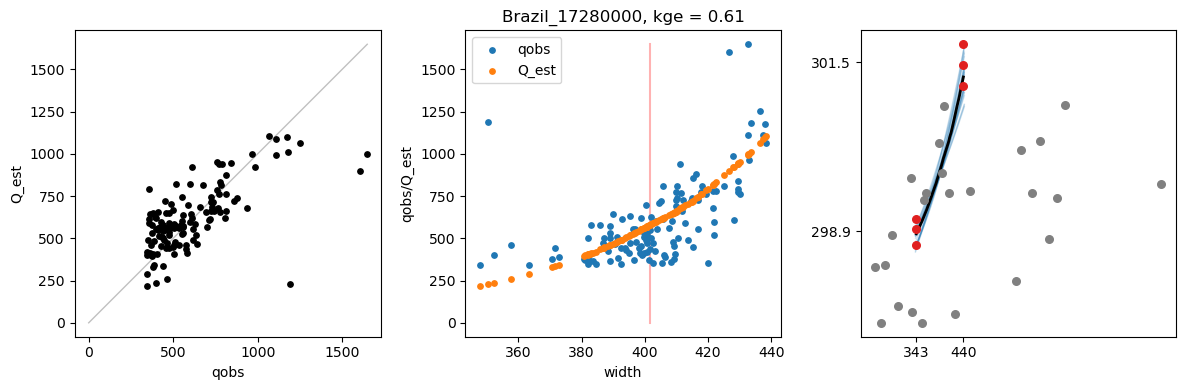

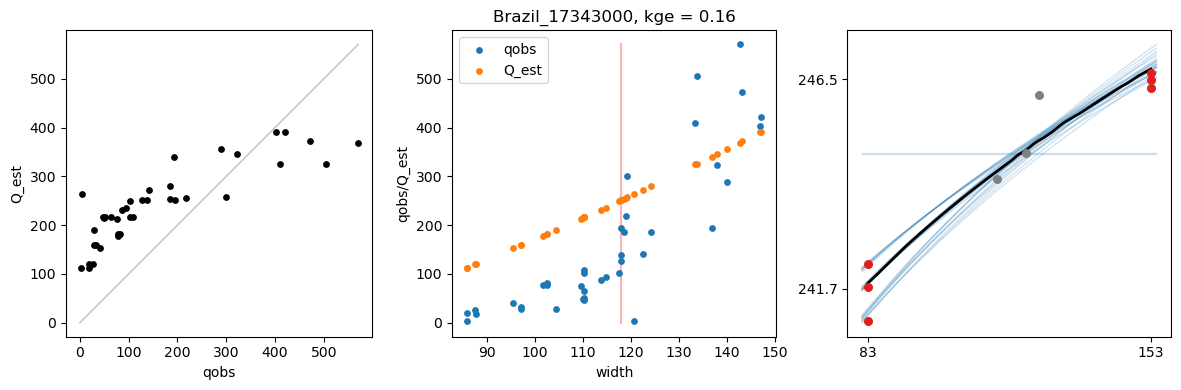

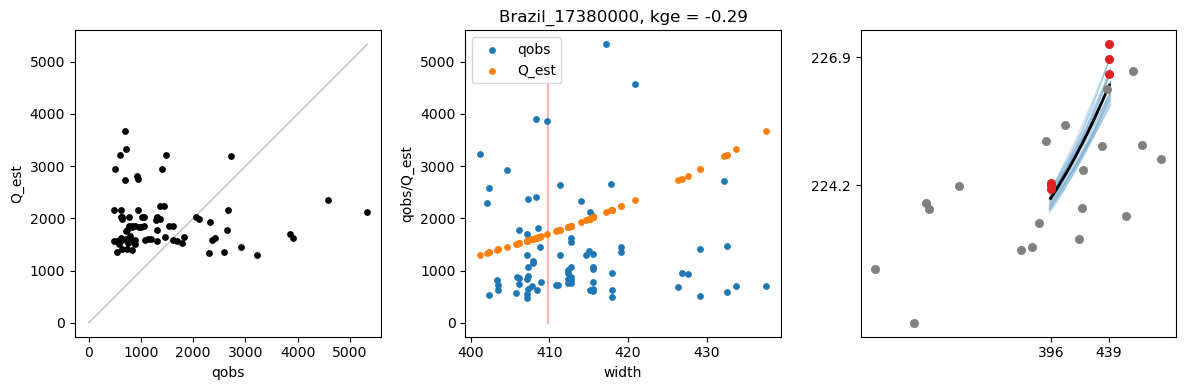

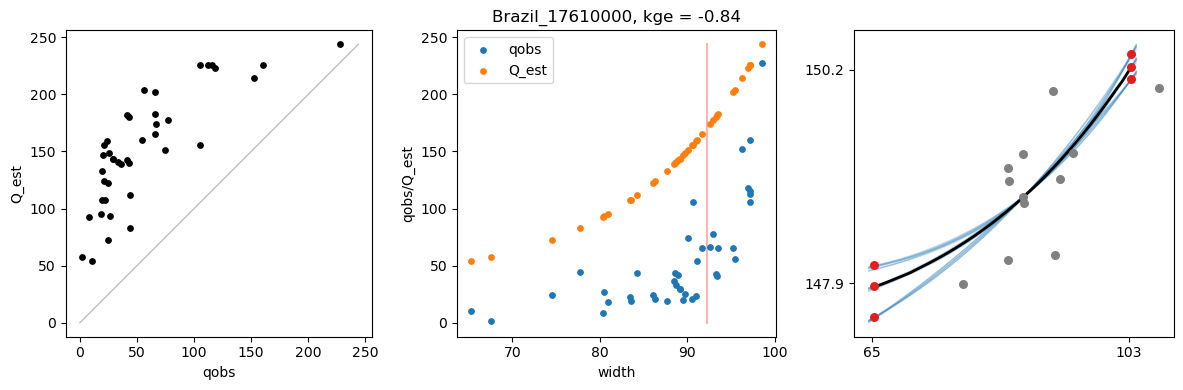

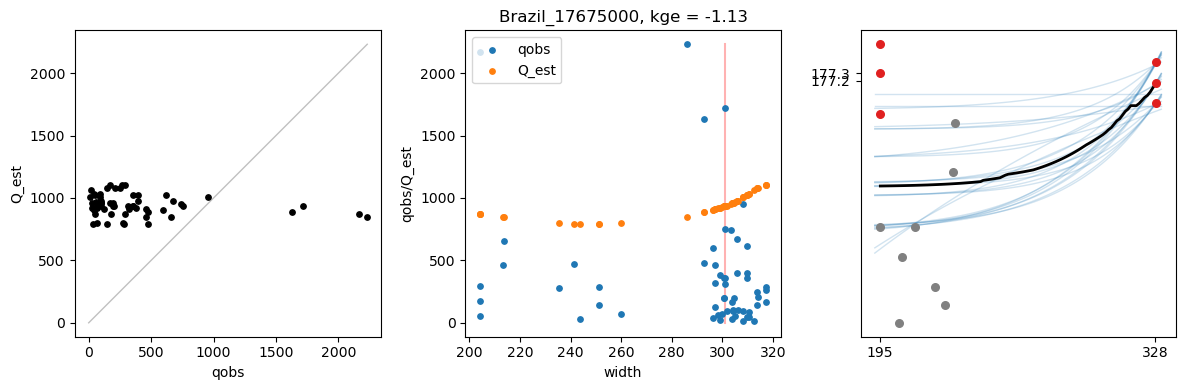

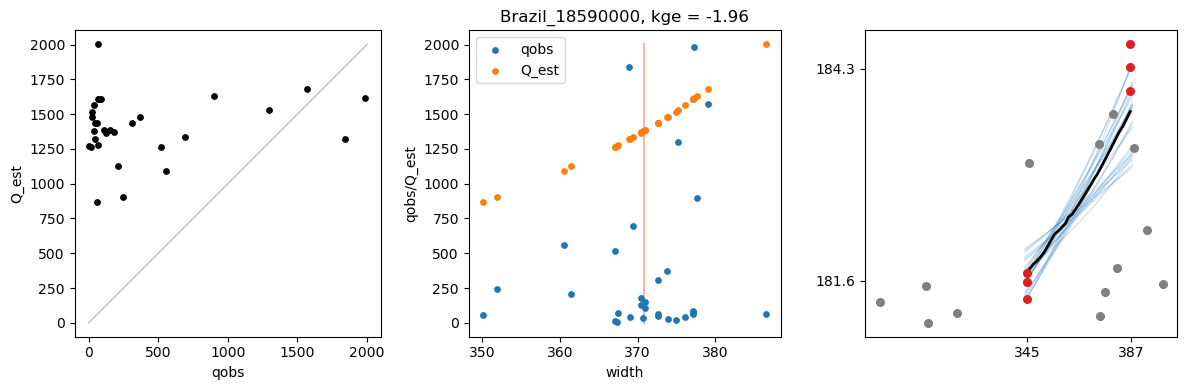

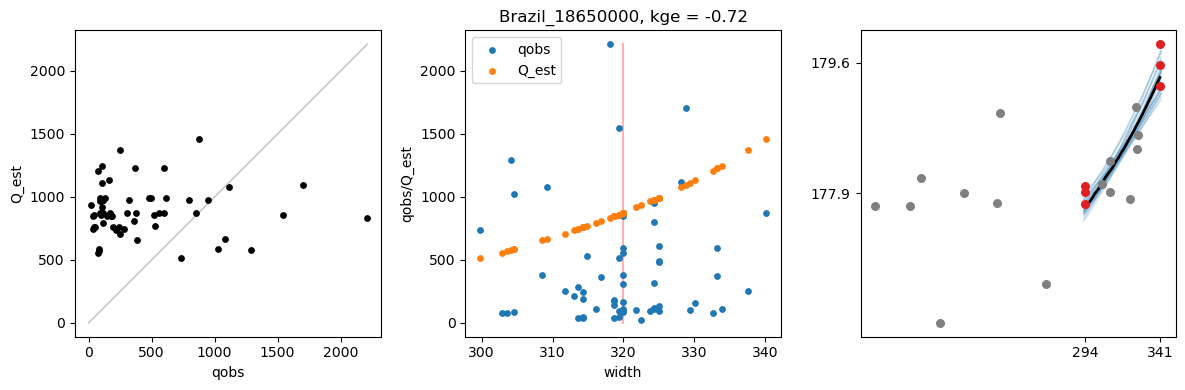

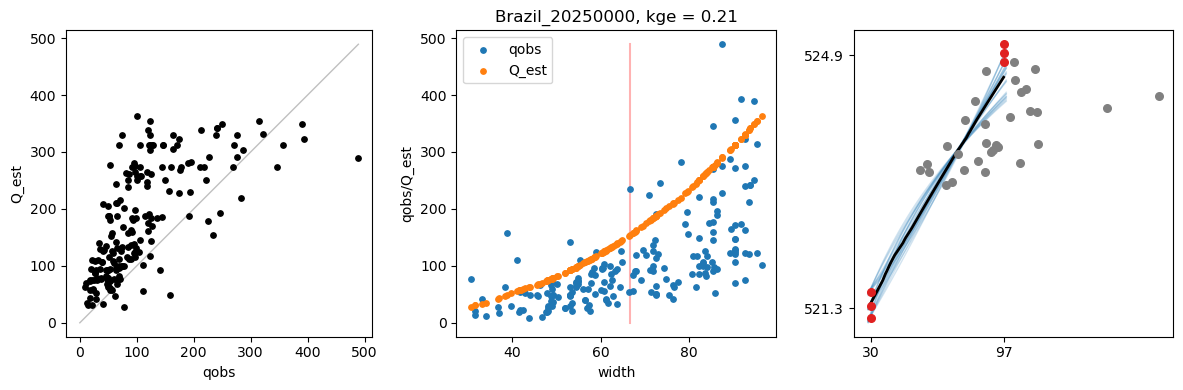

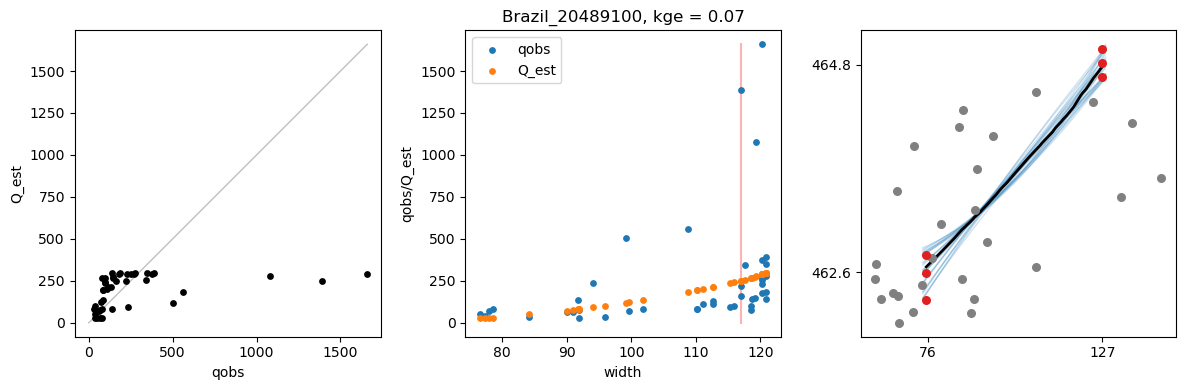

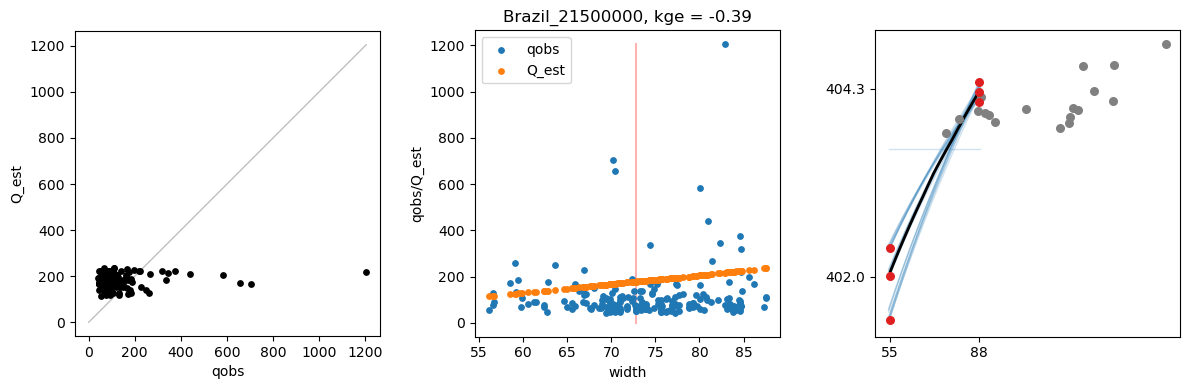

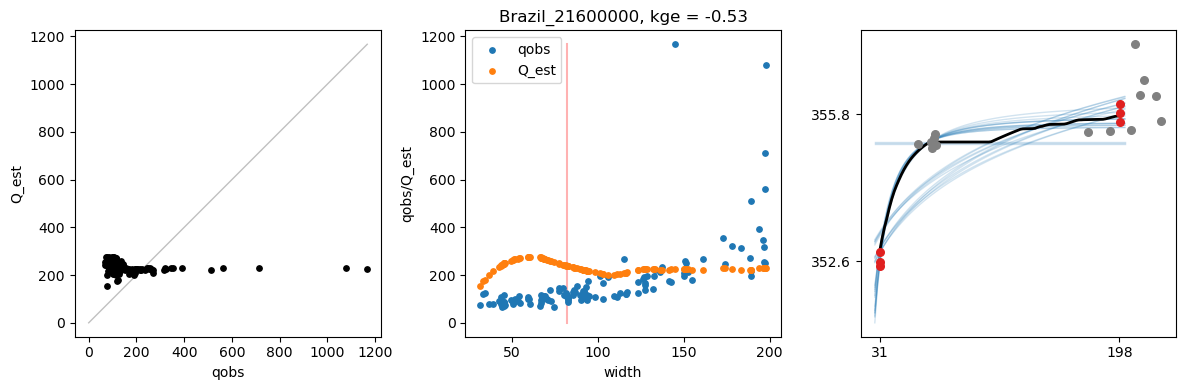

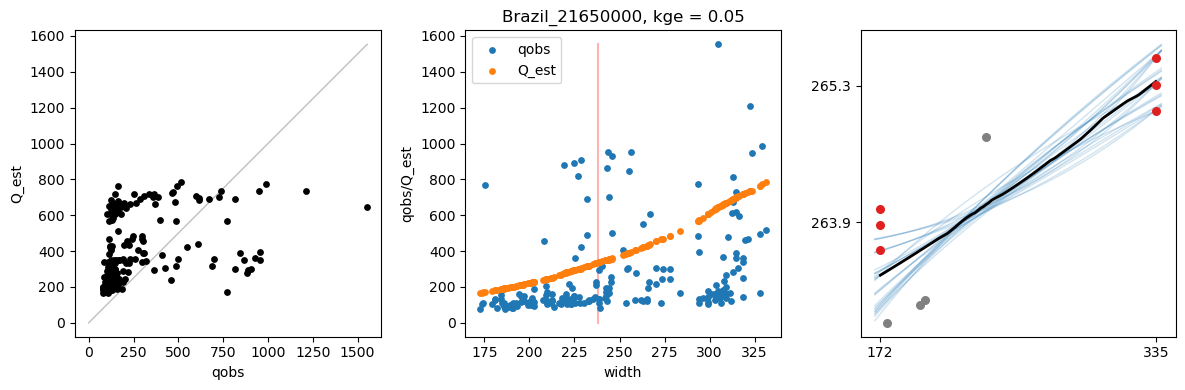

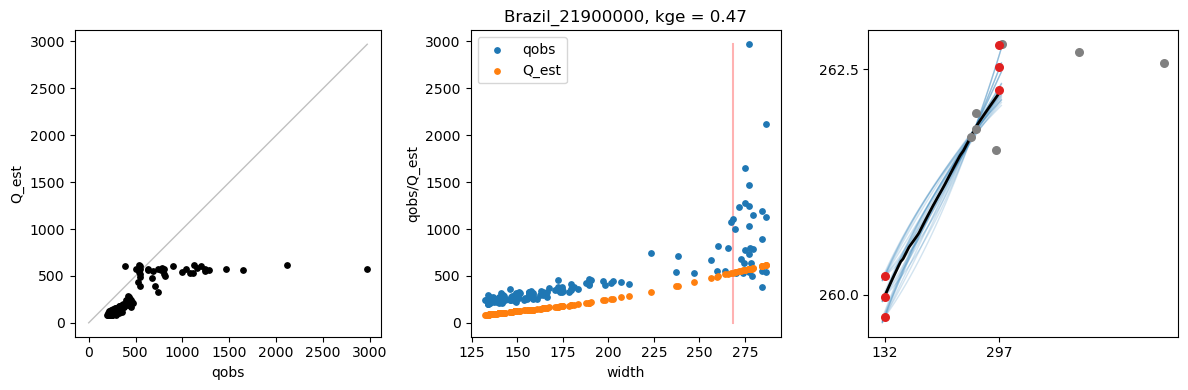

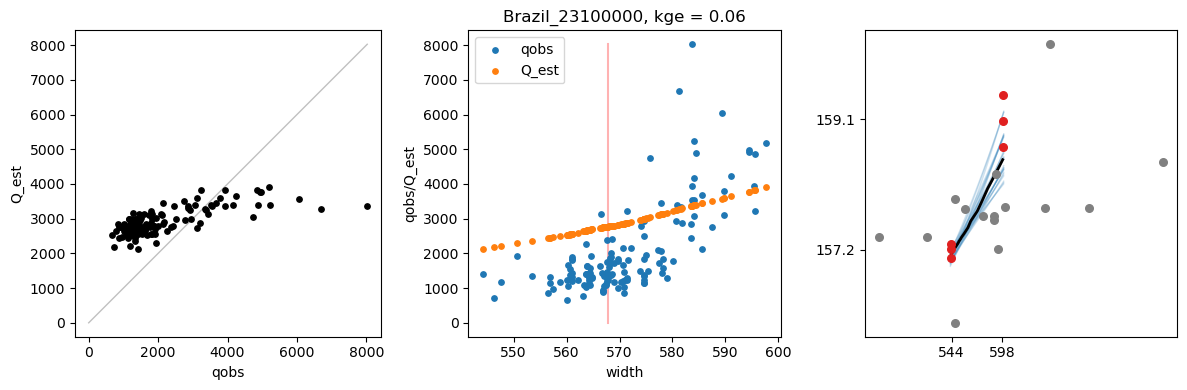

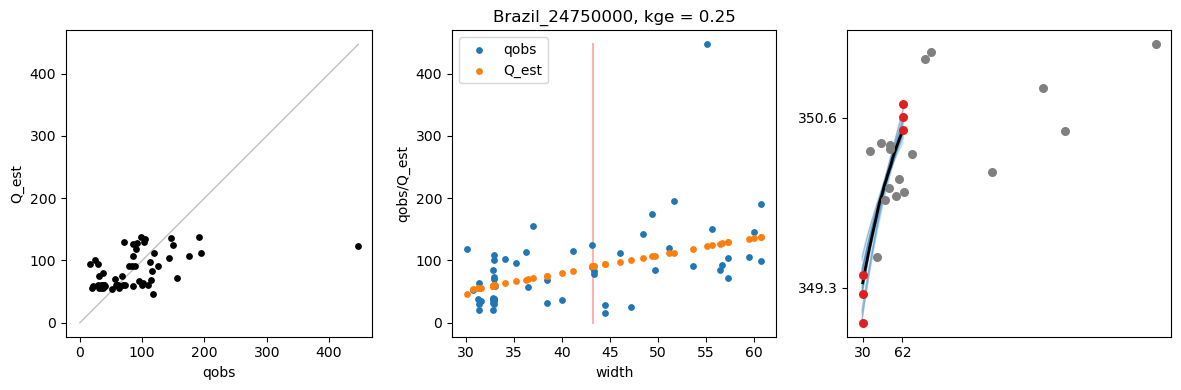

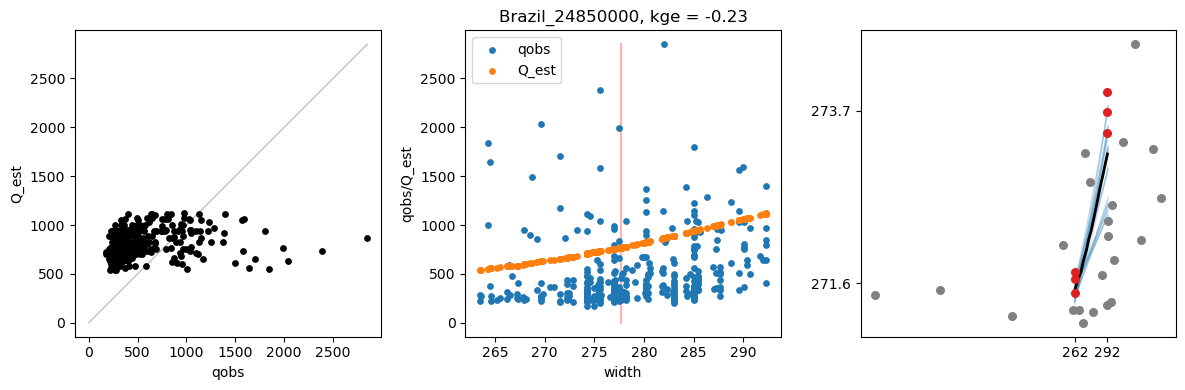

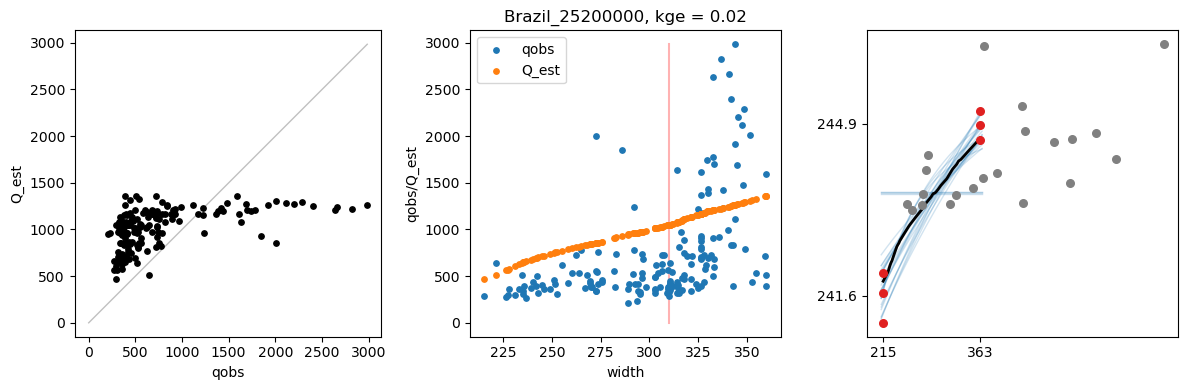

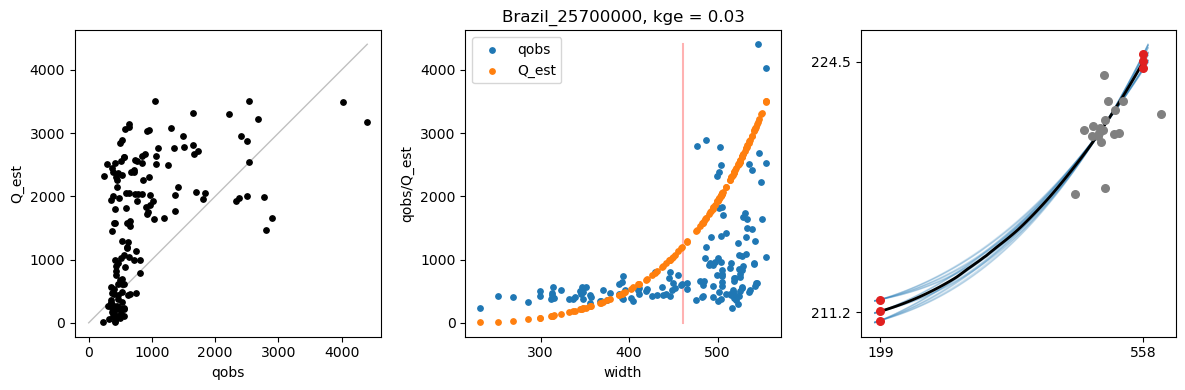

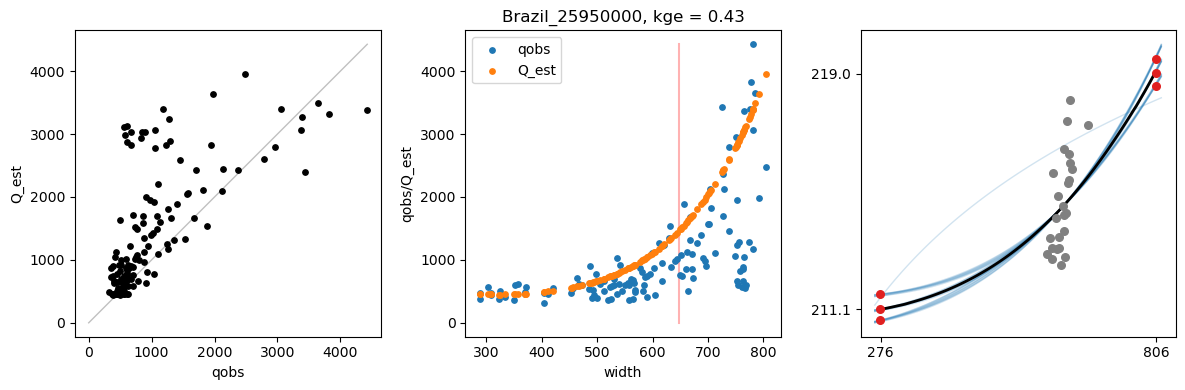

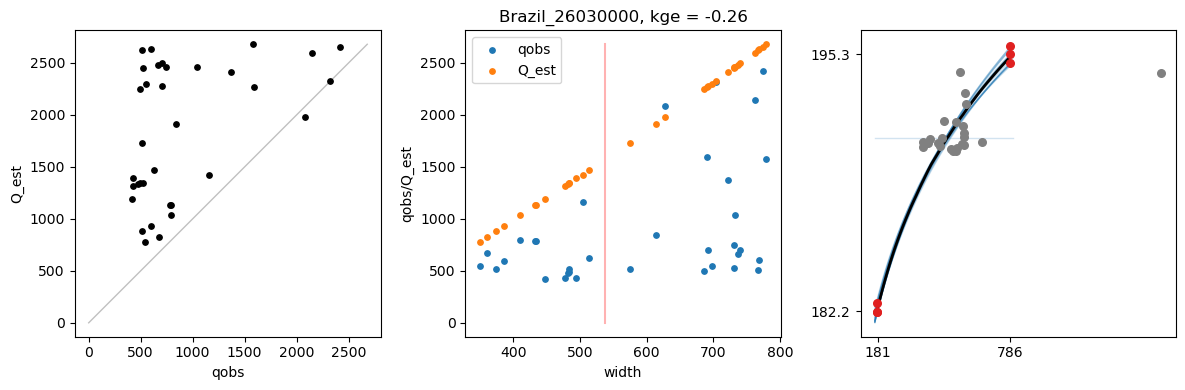

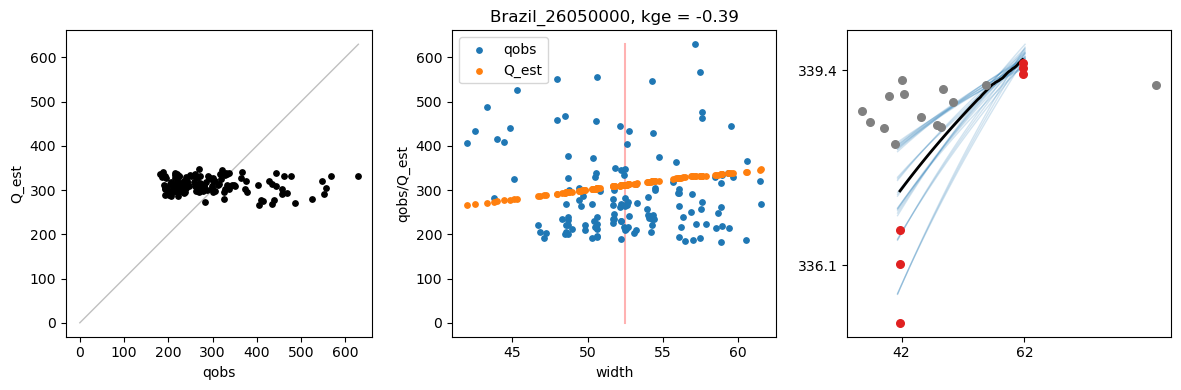

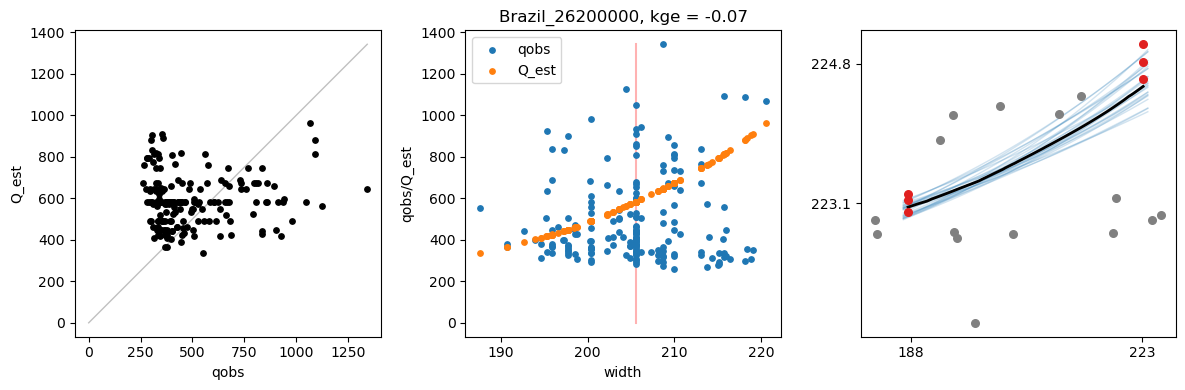

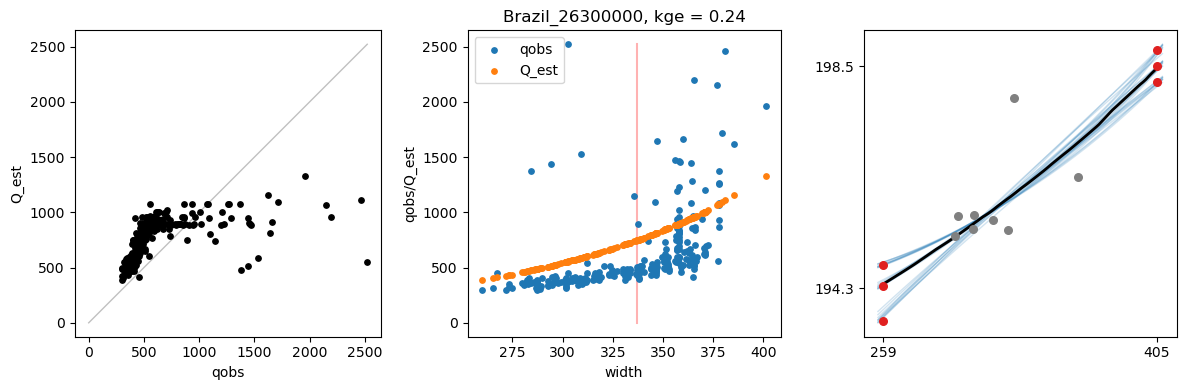

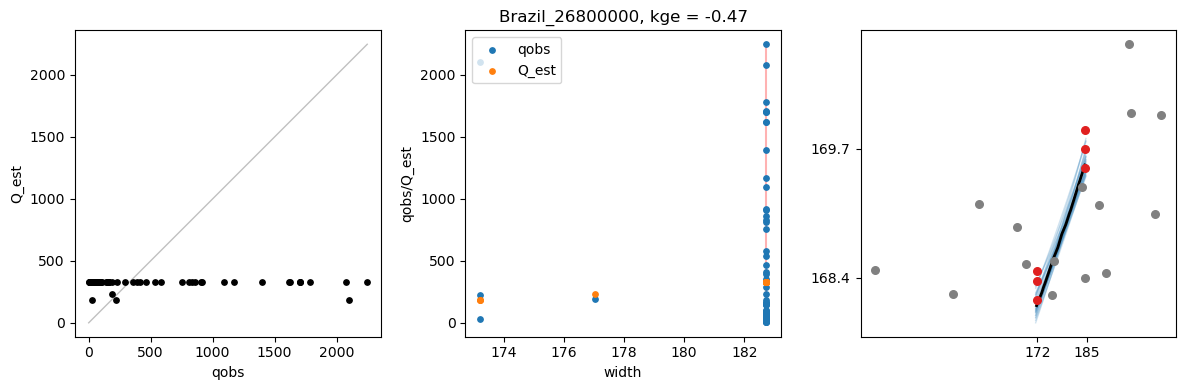

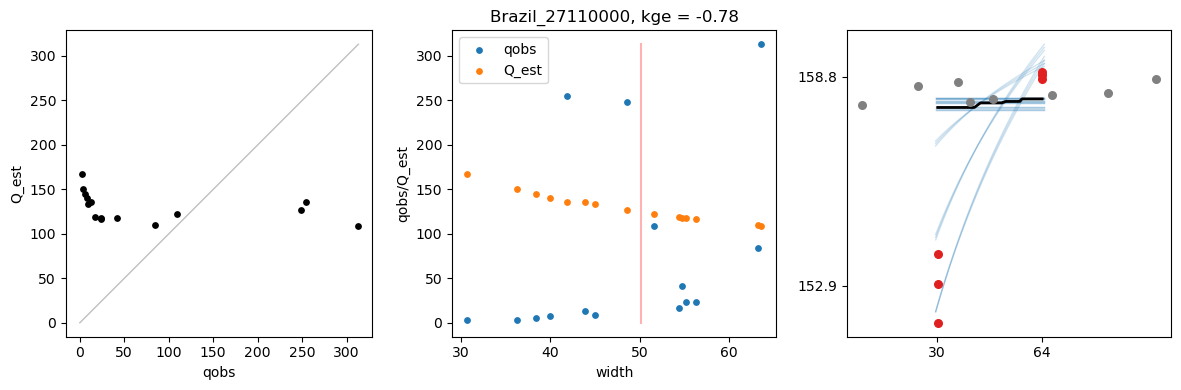

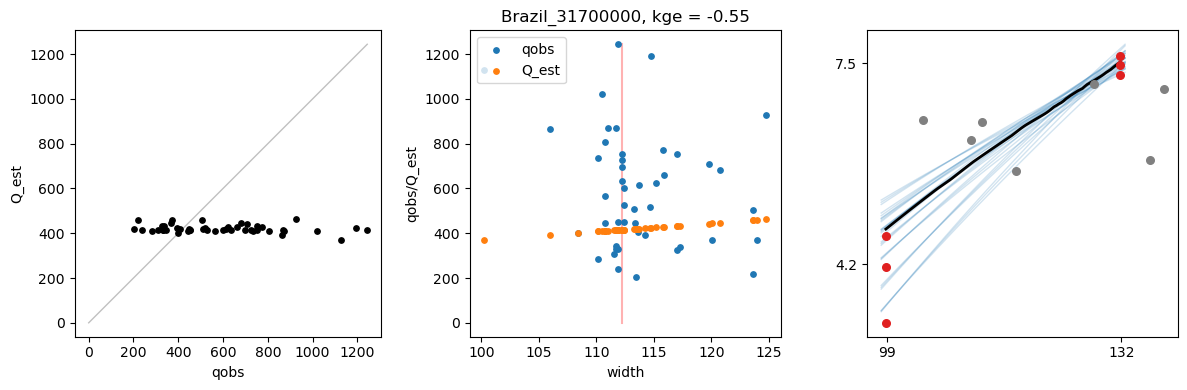

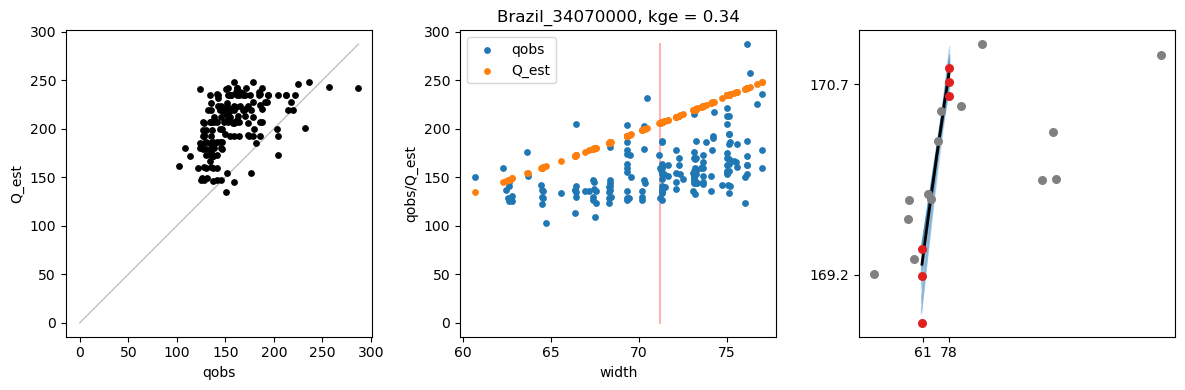

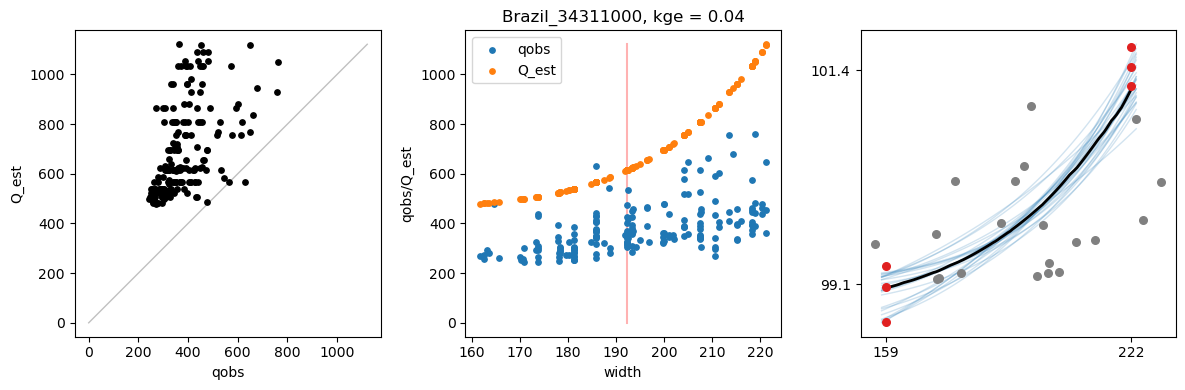

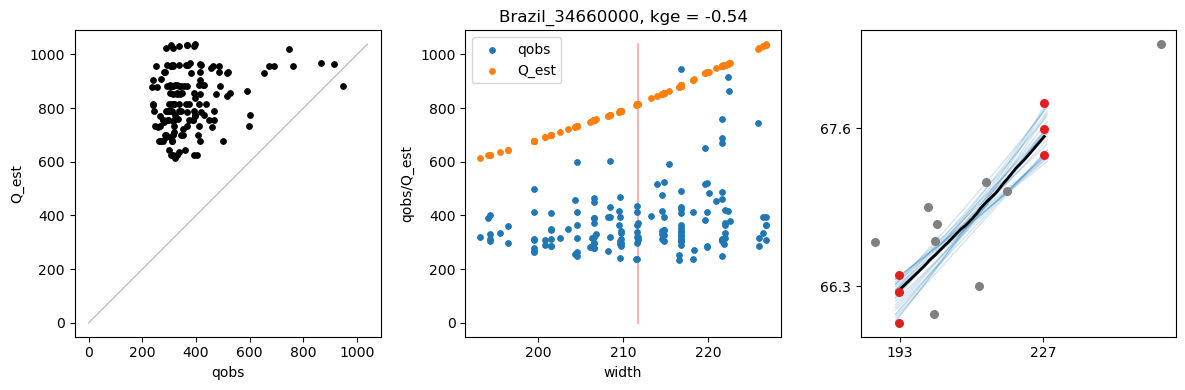

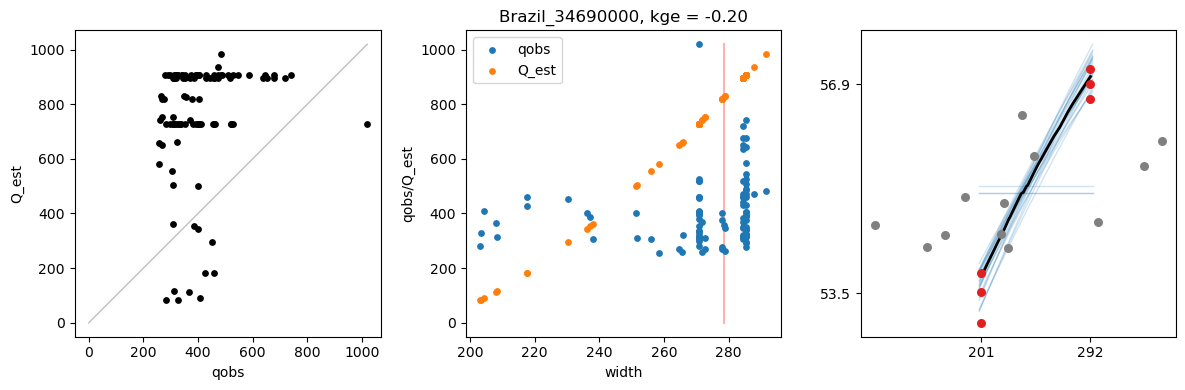

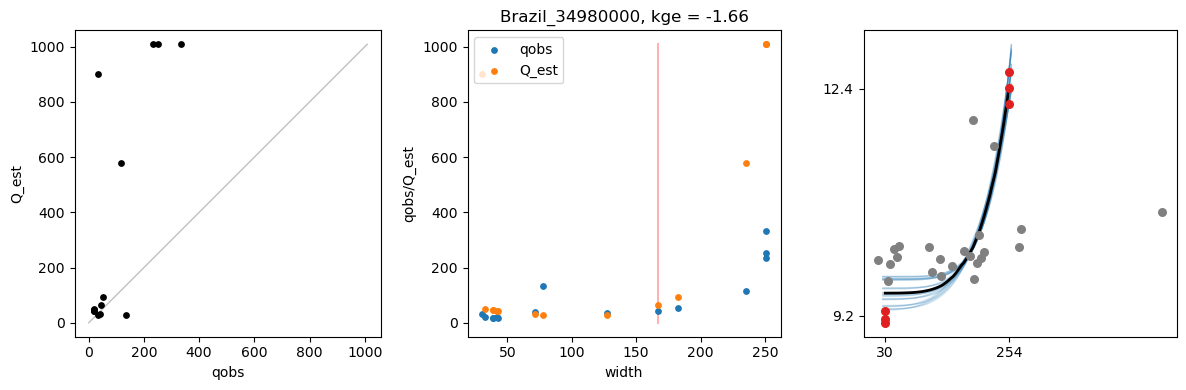

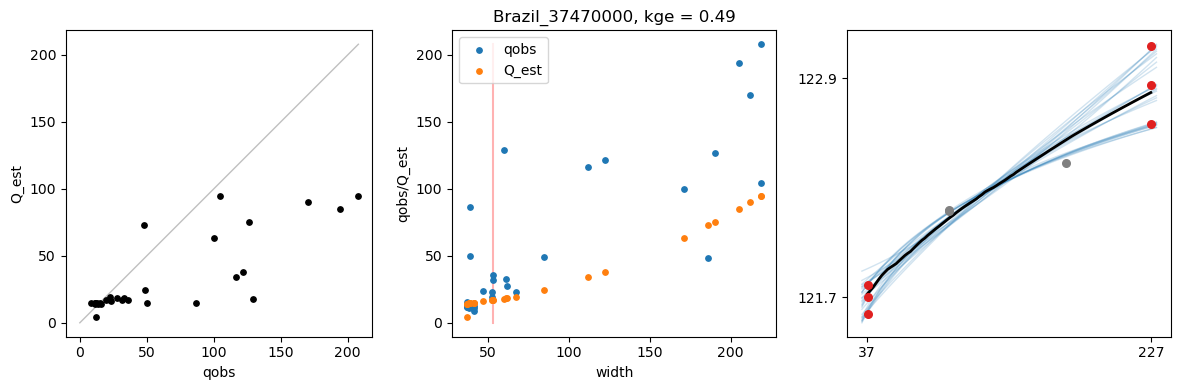

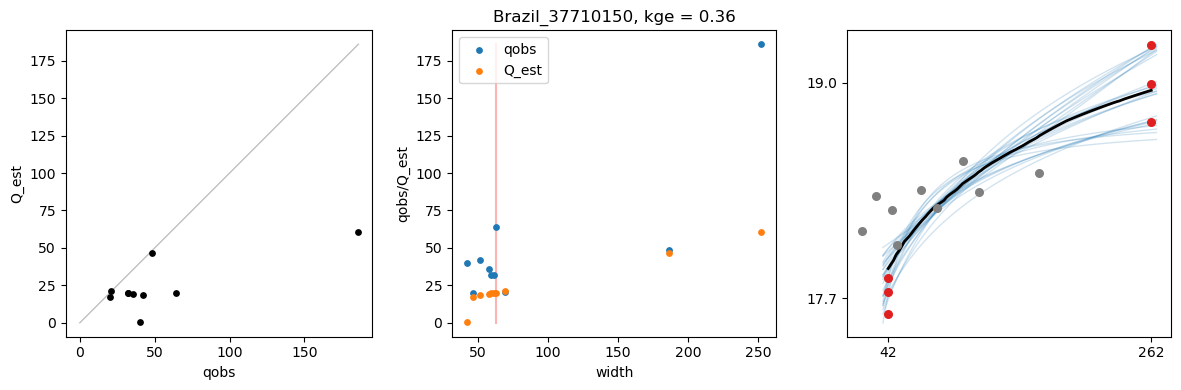

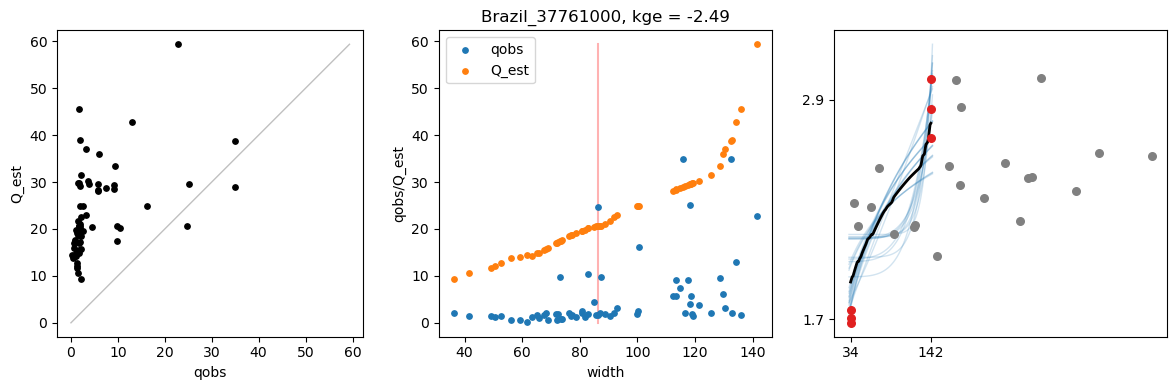

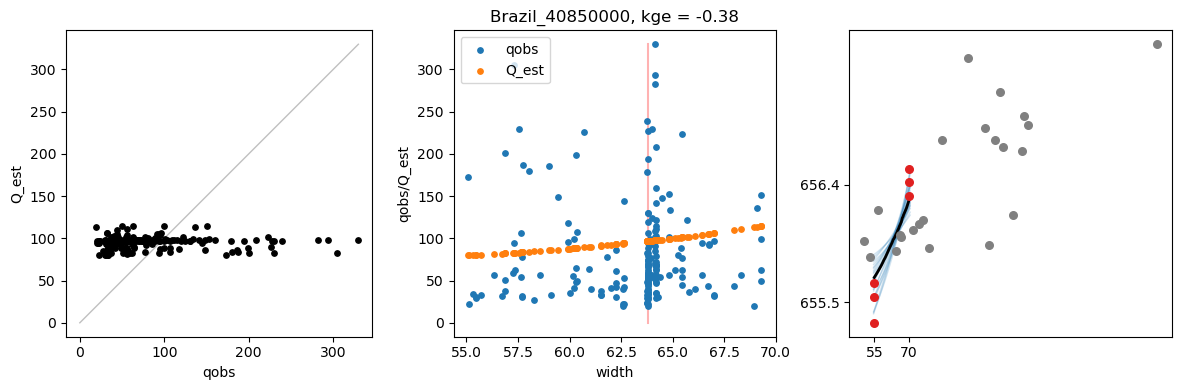

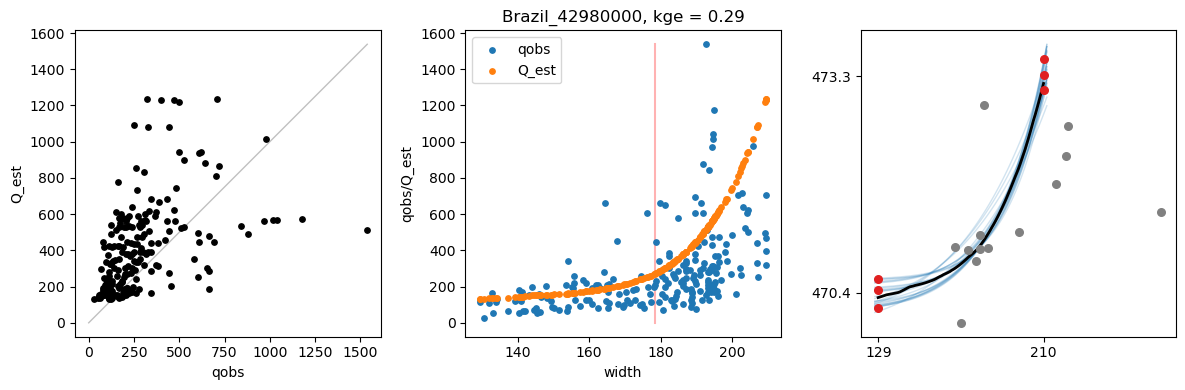

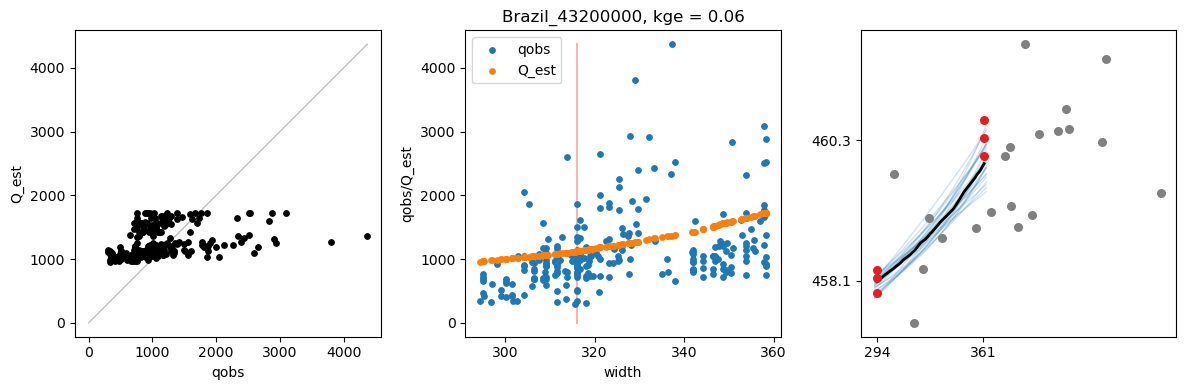

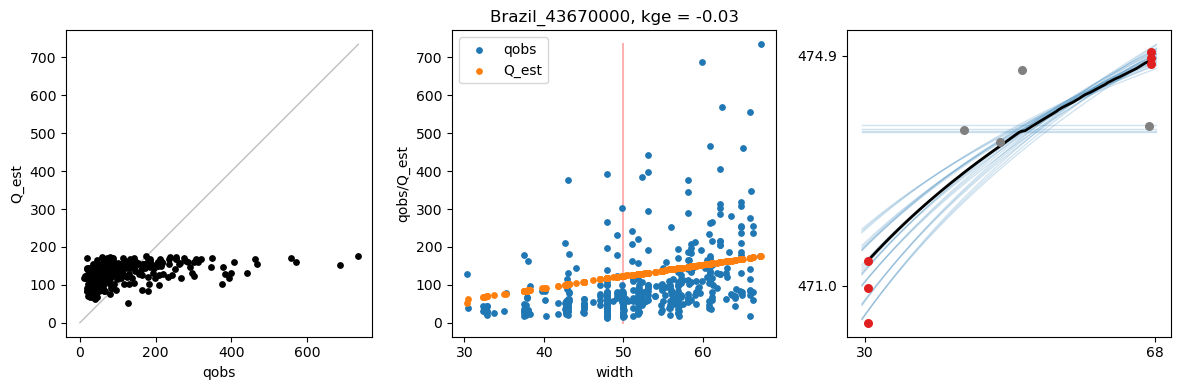

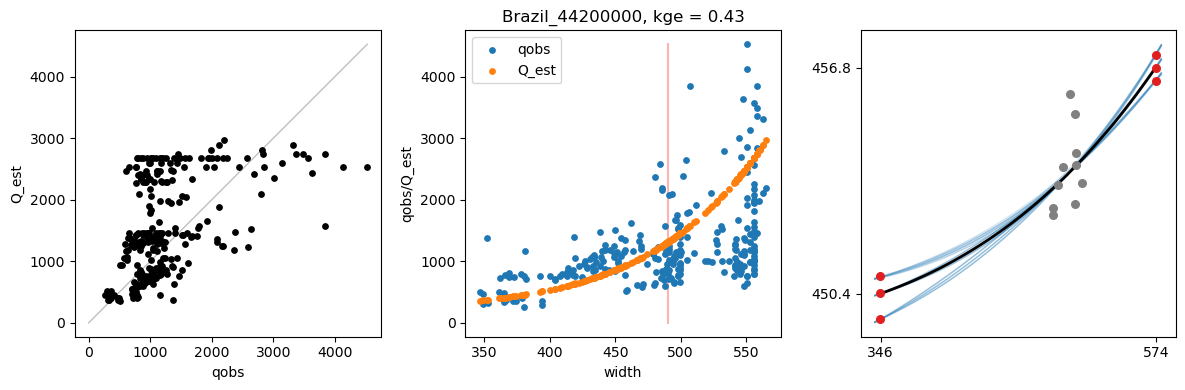

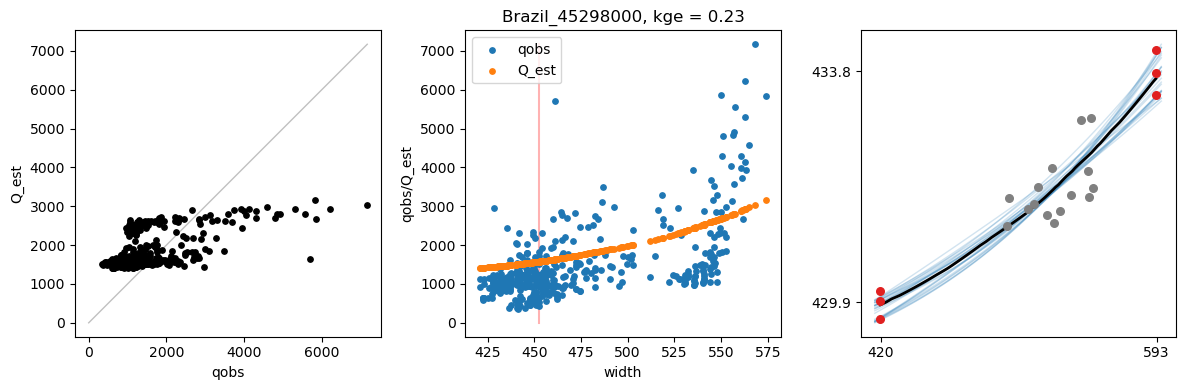

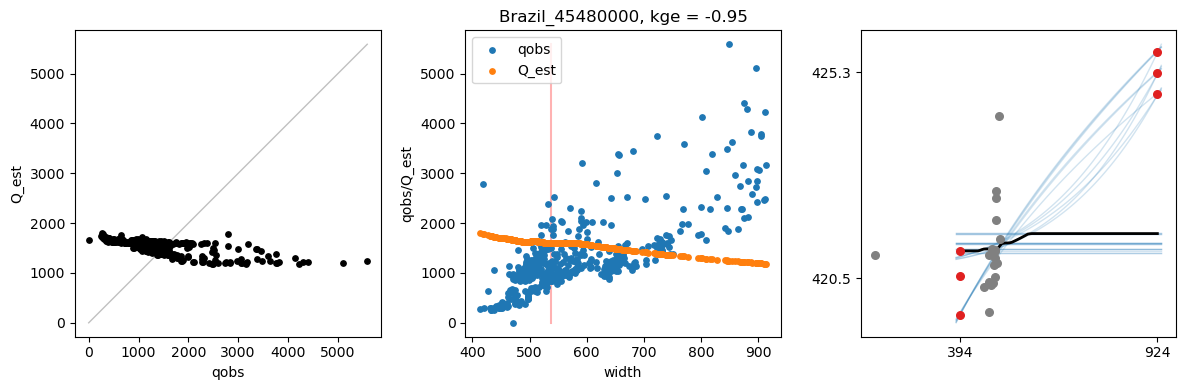

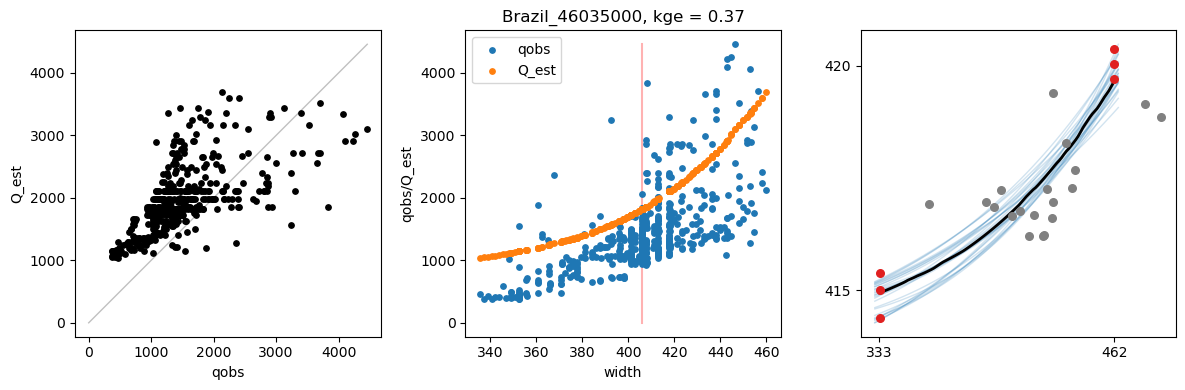

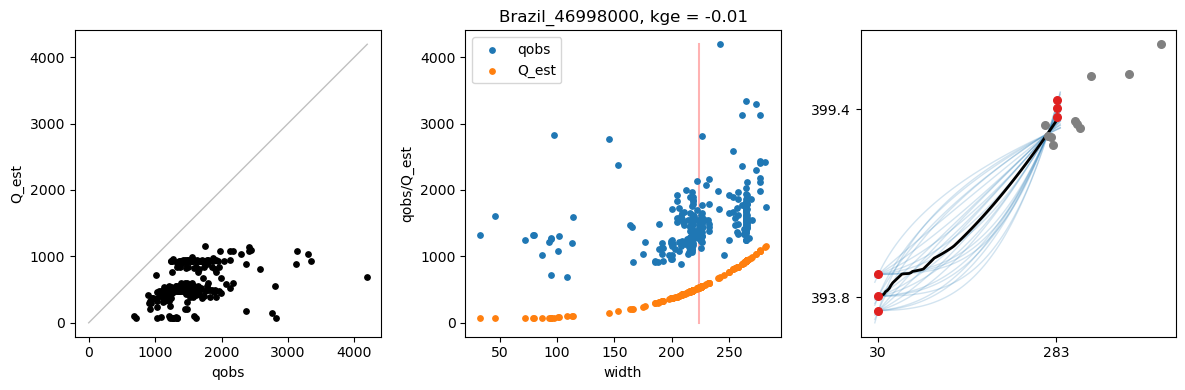

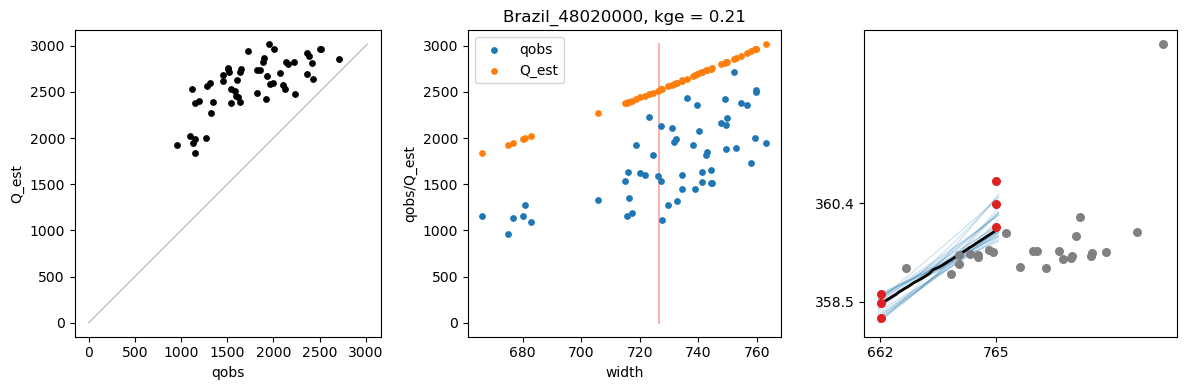

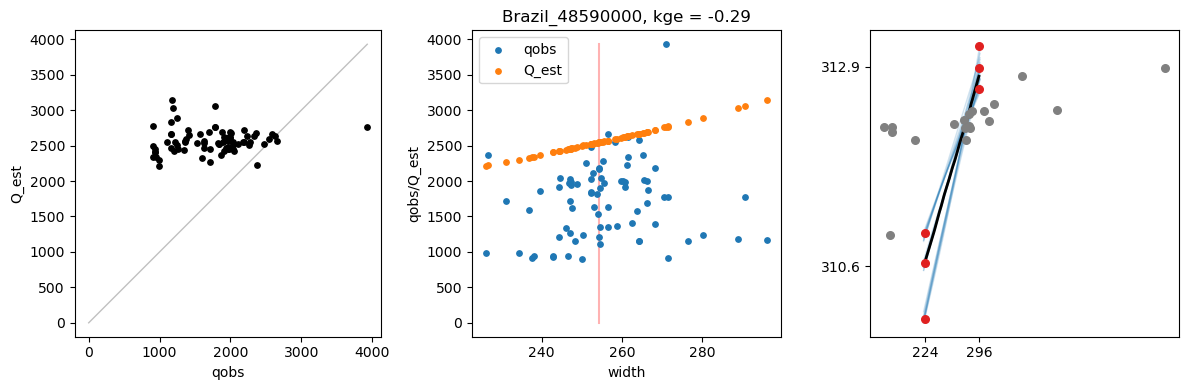

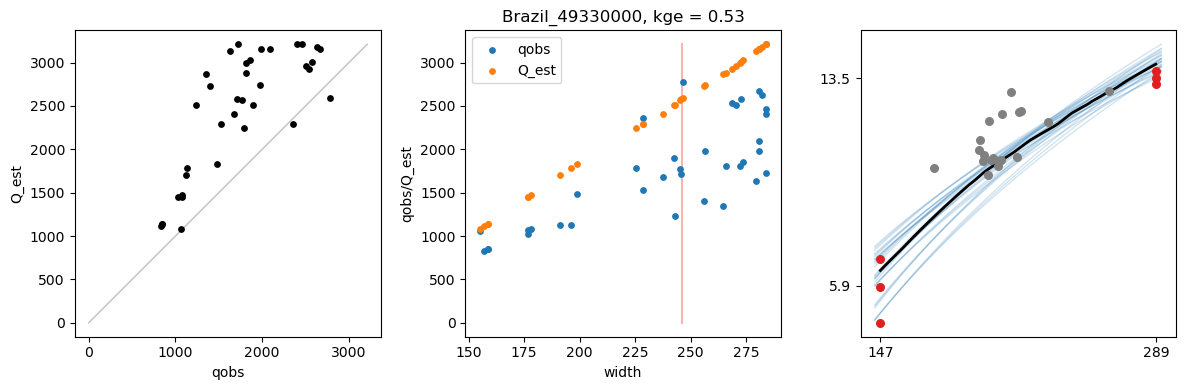

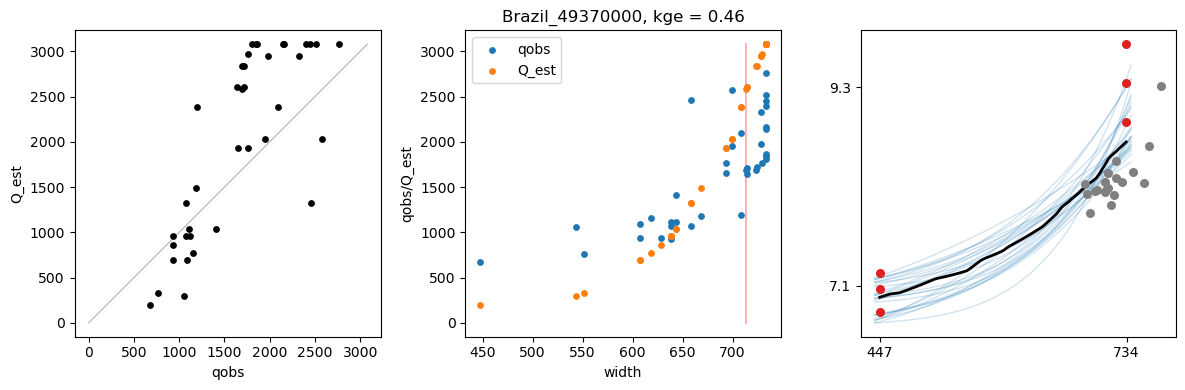

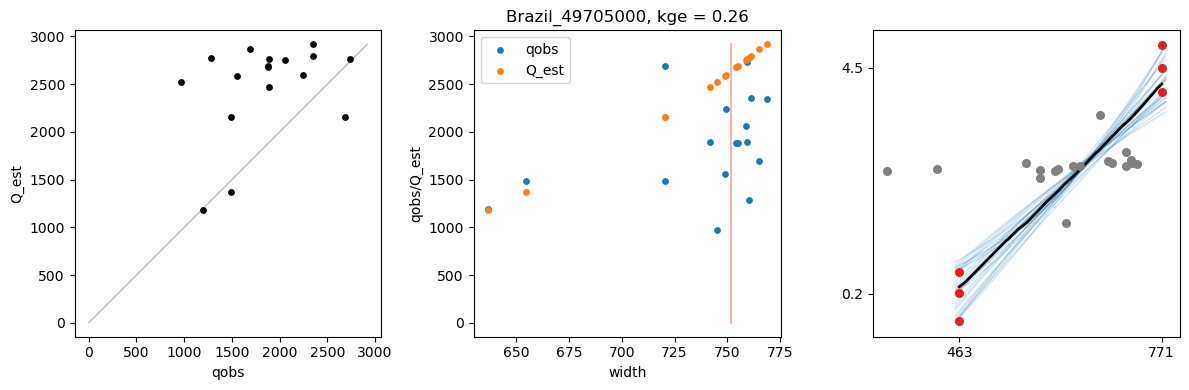

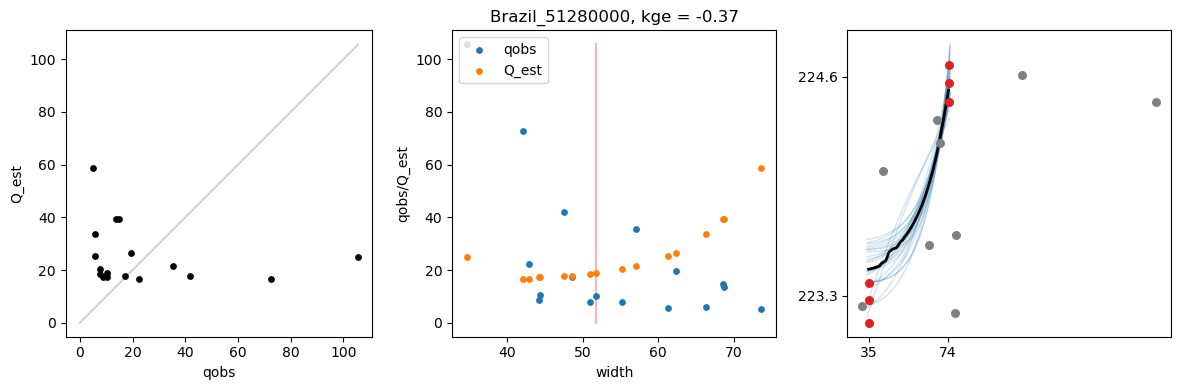

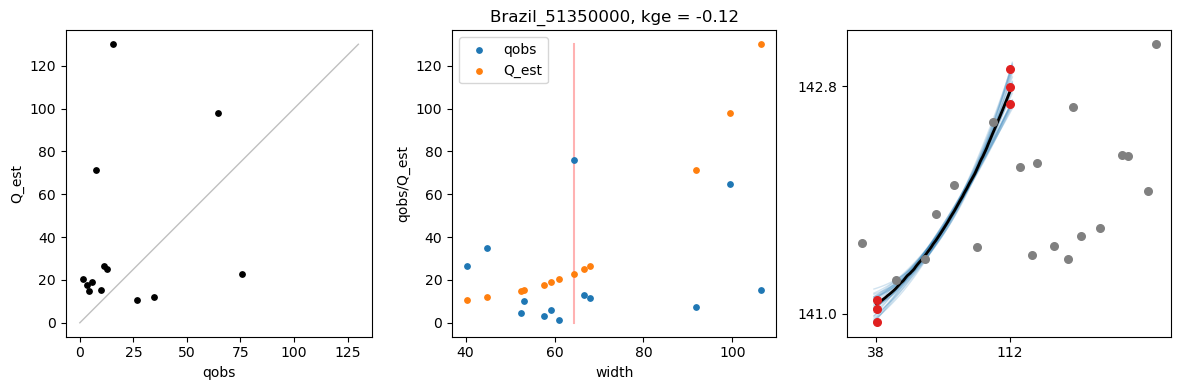

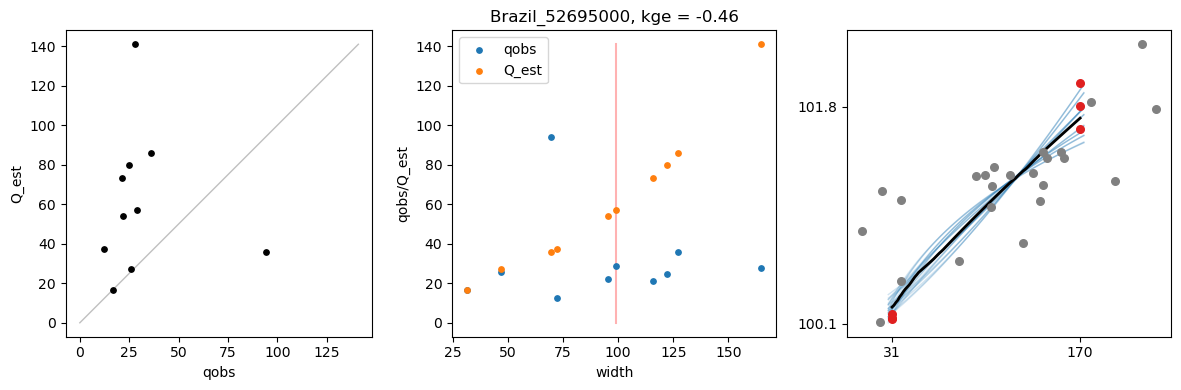

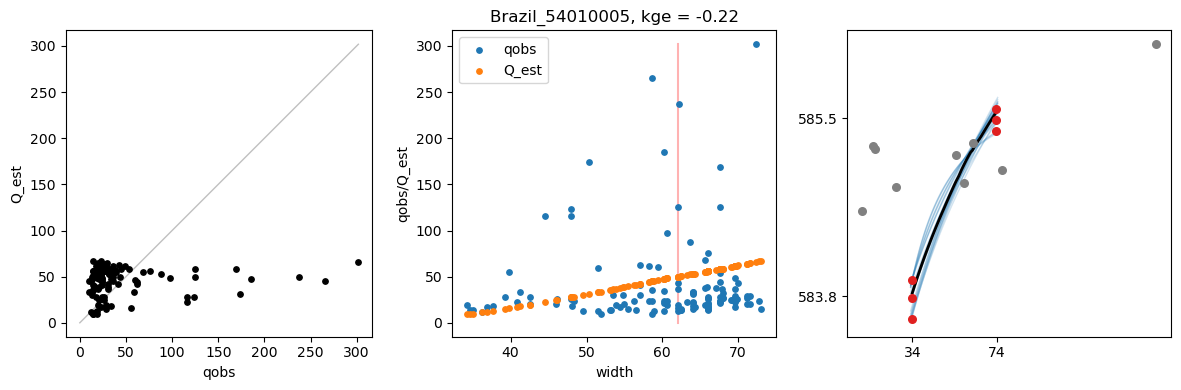

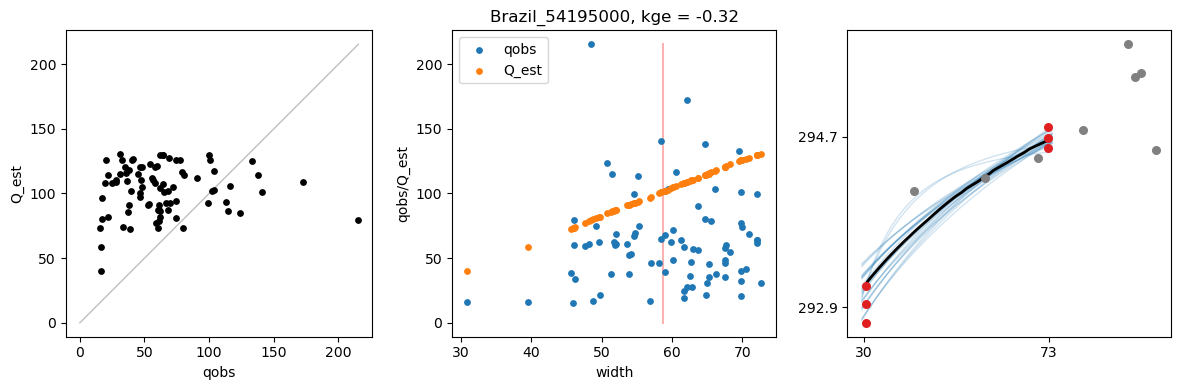

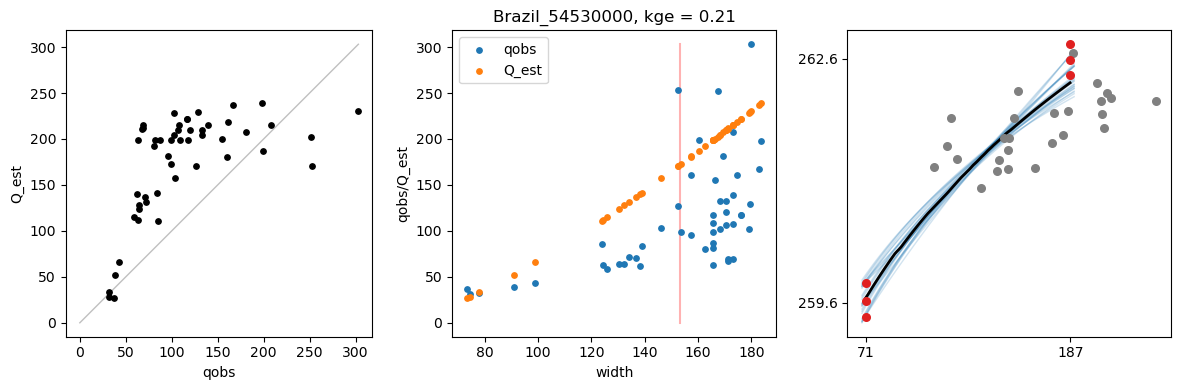

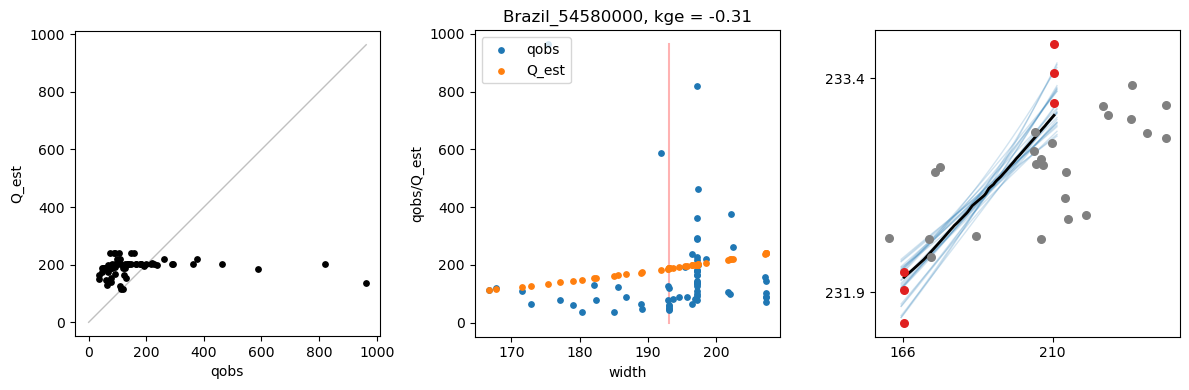

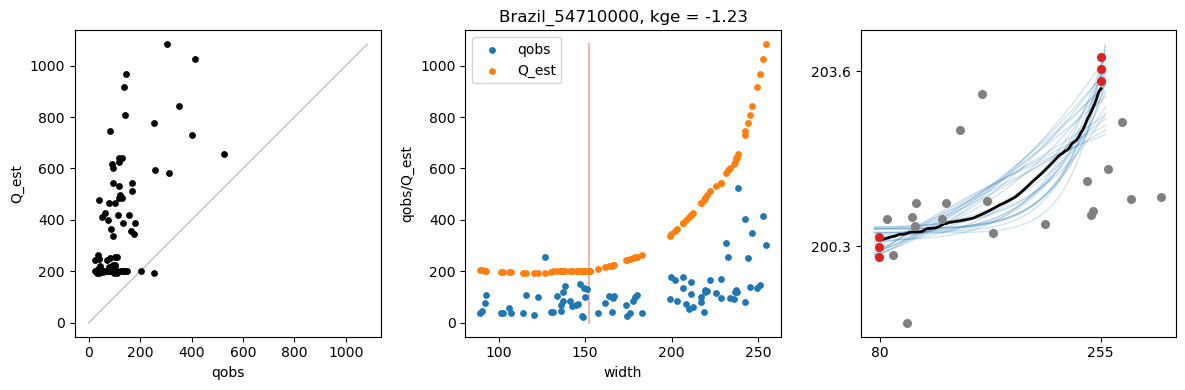

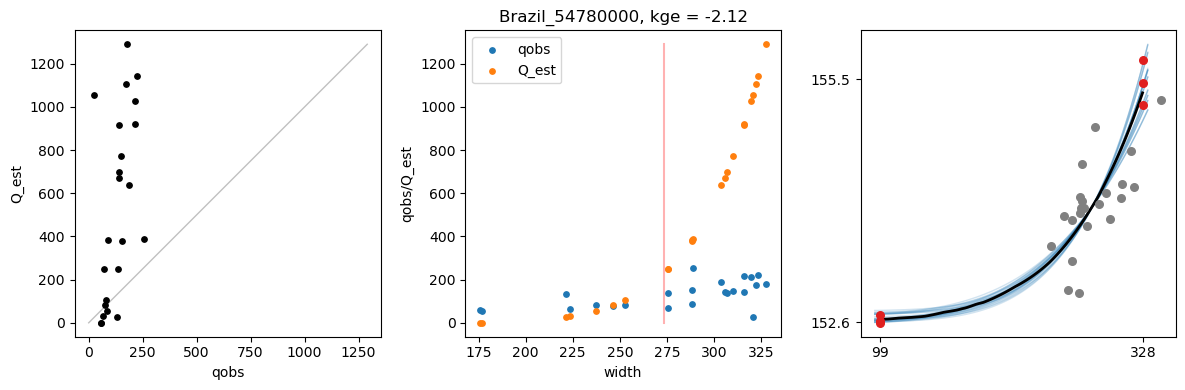

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

df_swot_all = pd.read_csv('swot_s3.csv')
df_fit_all = pd.read_csv('3/fit_proba.csv')
df_med_all = pd.read_csv('3/hypso_med.csv')
df_val_all = pd.read_csv('3/q_kge_med.csv')
stationids = sorted(df_val_all['stationid'].unique())

print(stationids)
for s in stationids[:100]:
    df_swot = df_swot_all[df_swot_all['stationid']==s]
    print(df_swot)
    df_fit = df_fit_all[df_fit_all['stationid']==s]
    df_med = df_med_all[df_med_all['stationid']==s]
    df_val = df_val_all[df_val_all['stationid']==s]

    fig, ax = plt.subplots(1,3,figsize=(12,4))
    ax1, ax2, ax3 = ax

    xmax = max(df_val['qobs'].max(), df_val['Q_est'].max())
    ax1.scatter(df_val['qobs'], df_val['Q_est'], s=15, c='black', zorder=1)
    ax1.plot([0,xmax], [0,xmax], c='#C0C0C0', lw=1, zorder=-1)
    ax1.set_xlabel('qobs')
    ax1.set_ylabel('Q_est')
    ax1.set_aspect(1)

    w50 = df_fit.iloc[0]['w50']
    hd1 = ax2.scatter(df_val['width'], df_val['qobs'], s=15)
    hd2 = ax2.scatter(df_val['width'], df_val['Q_est'], s=15)
    ax2.plot([w50,w50], [0,xmax], c='red', alpha=0.3, zorder=-1)
    ax2.legend(handles=[hd1,hd2], labels=['qobs','Q_est'], loc='upper left')
    ax2.set_xlabel('width')
    ax2.set_ylabel('qobs/Q_est')
    ax2.set_title('%s, kge = %.2f'%(s,df_val.iloc[0]['kge']))

    w_low, w_high = df_fit.iloc[0][['w_low','w_high']]
    h_low = df_fit['h_low'].unique()
    h_high = df_fit['h_high'].unique()
    ax3.scatter(df_swot['width'], df_swot['wse'], color='#808080', s=30, zorder=1)
    ax3.scatter(np.ones(len(h_low))*w_low, h_low, color='#E02020', s=30, zorder=2)
    ax3.scatter(np.ones(len(h_high))*w_high, h_high, color='#E02020', s=30, zorder=2)
    ax3.plot(df_med['width'], df_med['wse'], color='black', lw=2, zorder=0)

    x_min = w_low * 1.02 - w_high * 0.02
    x_max = w_high * 1.02 - w_low * 0.02
    plot_x = np.linspace(x_min, x_max, 100)
    for k in range(len(df_fit)):
        wse0, a, b = df_fit.iloc[k][['wse0','a','b']]
        plot_y = wse0 + a * plot_x**b
        ax3.plot(plot_x, plot_y, color='#1f77b4', lw=1, alpha=0.2, zorder=-1)

    ax3.set_xticks(np.round([w_low,w_high],0))
    ax3.set_yticks(np.round([np.median(h_low),np.median(h_high)],1))

    fig.tight_layout()
    #plt.show()
    plt.savefig('3/3sup1_fig_q_qest/%s.png'%s, dpi=200)
